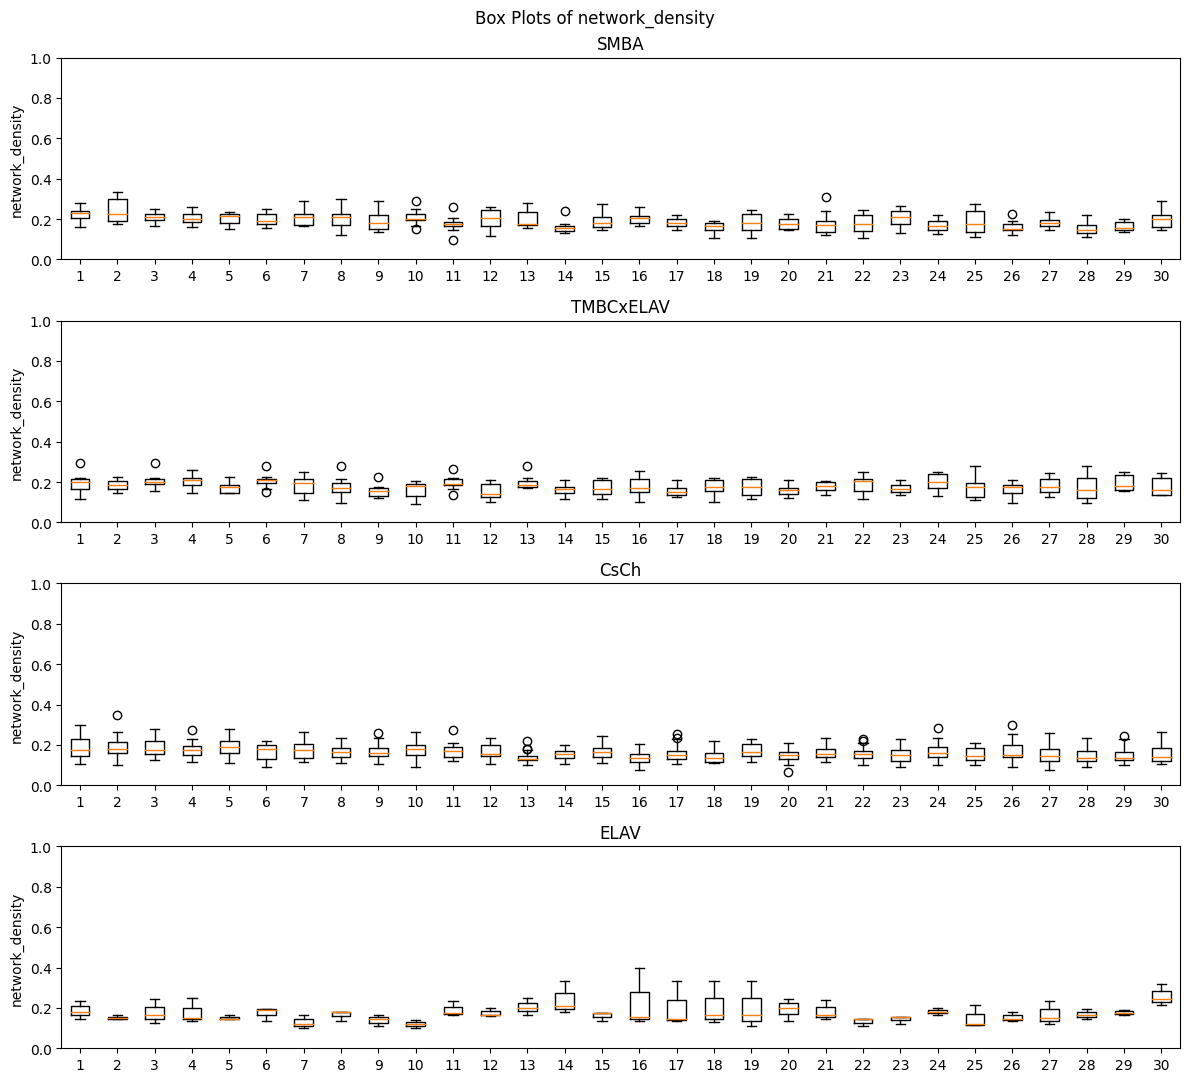

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from src.utils import fileio
import matplotlib.pyplot as plt

path = "/home/milky/drosophila-SNA/data/results/global_measures/60_sec_window"
all_treatments = fileio.load_multiple_folders(path)
measure_name = "network_density"
max_time_points = 0
for treatment_name, treatment_path in all_treatments.items():
    all_groups = fileio.load_files_from_folder(treatment_path)

    for group_name, group_path in all_groups.items():
        df = pd.read_csv(group_path, index_col=0)
        max_time_points = max(max_time_points, len(df))

fig, axs = plt.subplots(4, 1, figsize=(12, 11))
for i, (treatment_name, treatment_path) in enumerate(all_treatments.items()):
    all_groups = fileio.load_files_from_folder(treatment_path)
    treatment_time_data = [[] for _ in range(max_time_points)]
    for group_name, group_path in all_groups.items():
        df = pd.read_csv(group_path, index_col=0)
        for time_point in range(len(df)):
            measure_data = df.loc[time_point, measure_name]
            treatment_time_data[time_point].append(measure_data)

    time_points = np.arange(1, max_time_points + 1)
    treatment_measure_data = [np.array(data) for data in treatment_time_data]
    axs[i].boxplot(treatment_measure_data)
    axs[i].set_ylim(0, 1)
    axs[i].set_xticks(range(1, max_time_points + 1))
    axs[i].set_xticklabels(time_points)
    axs[i].set_ylabel(measure_name)
    axs[i].set_title(treatment_name)

fig.suptitle('Box Plots of {}'.format(measure_name))
plt.tight_layout()
plt.show()


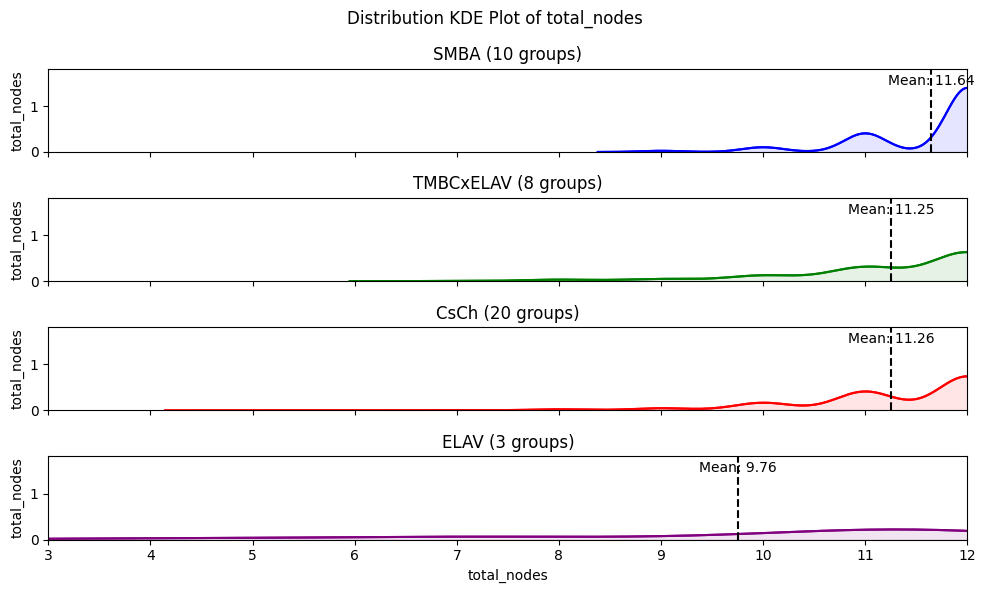

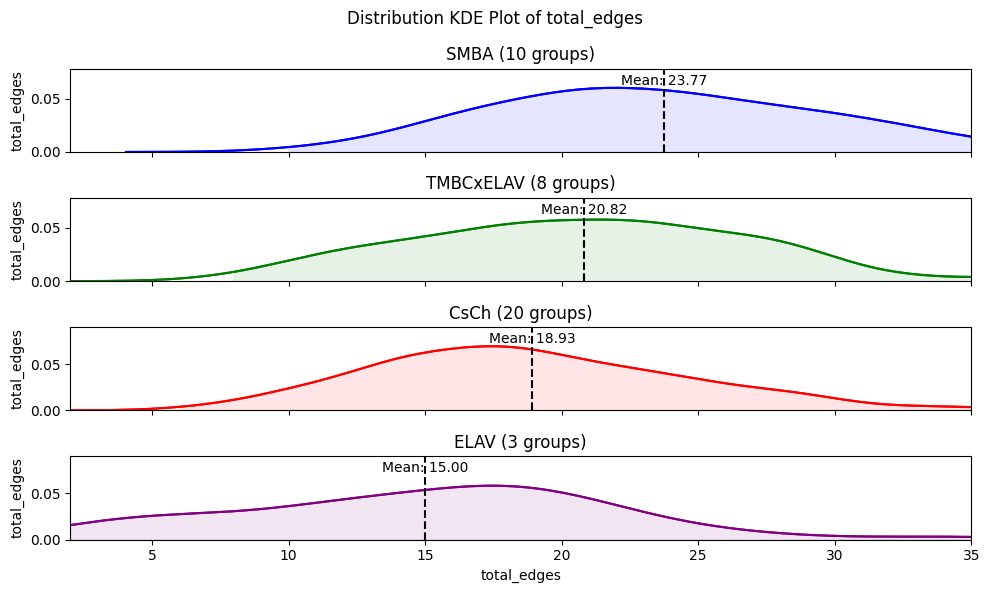

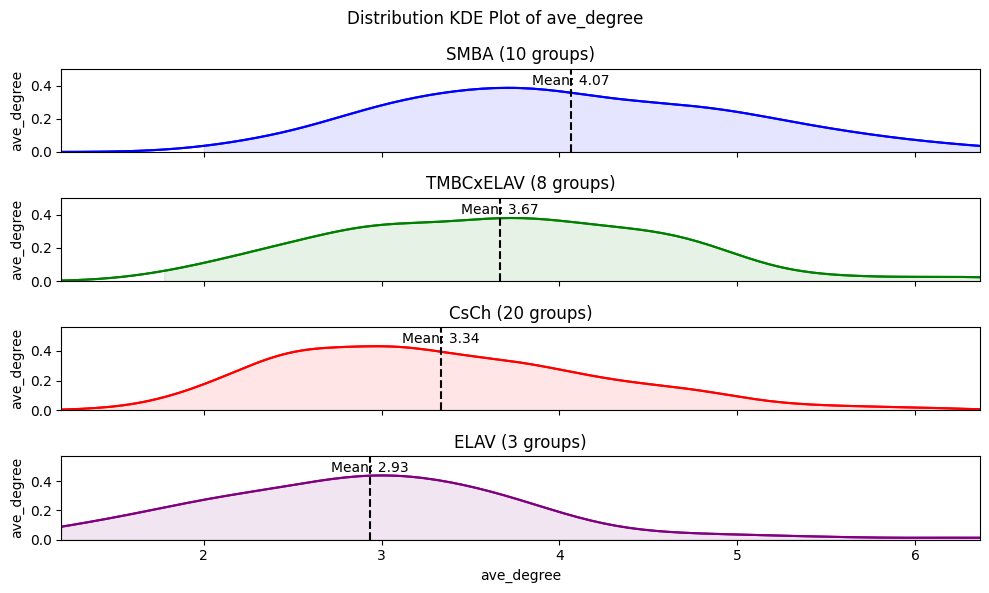

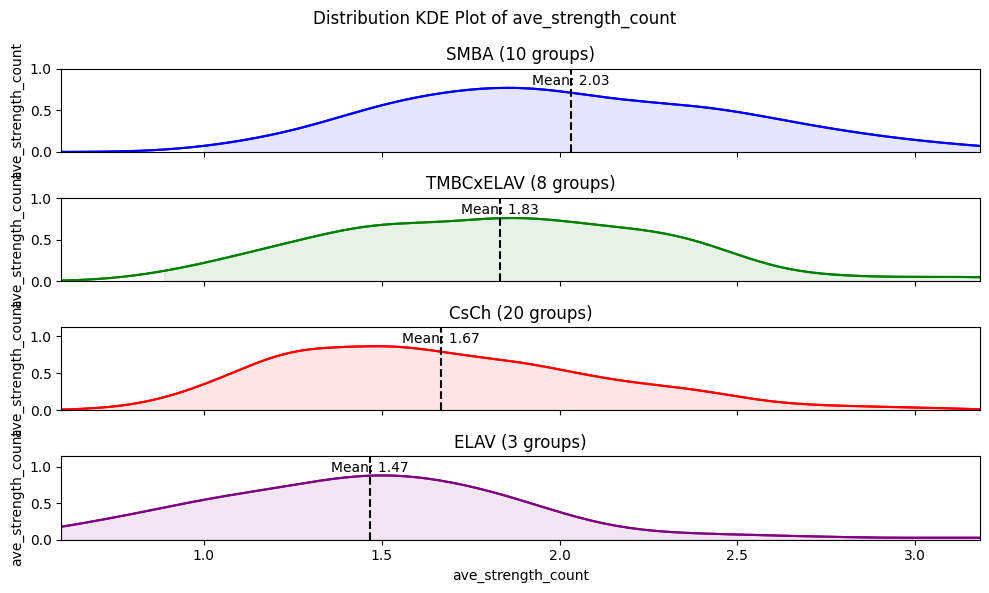

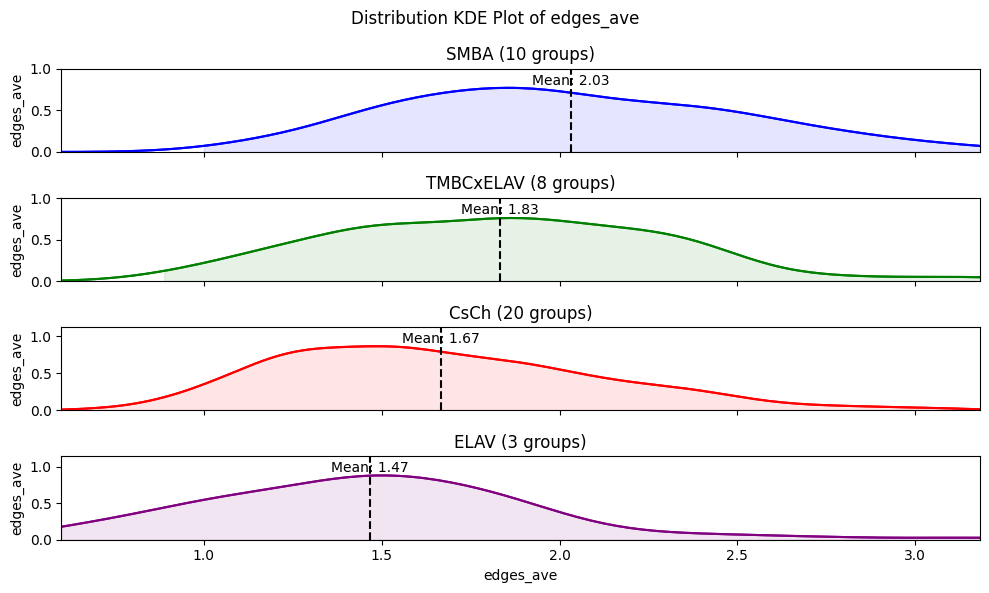

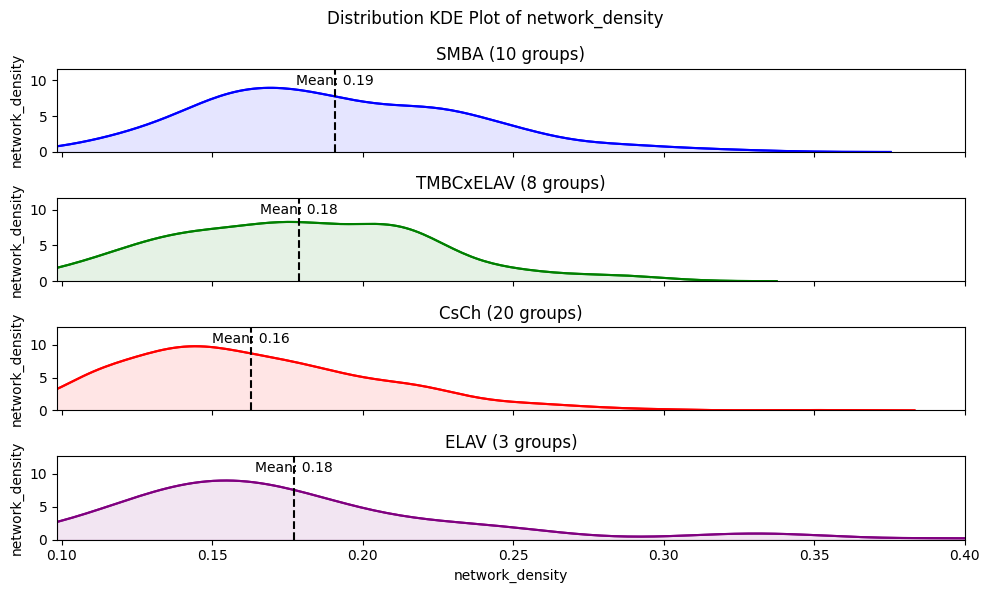

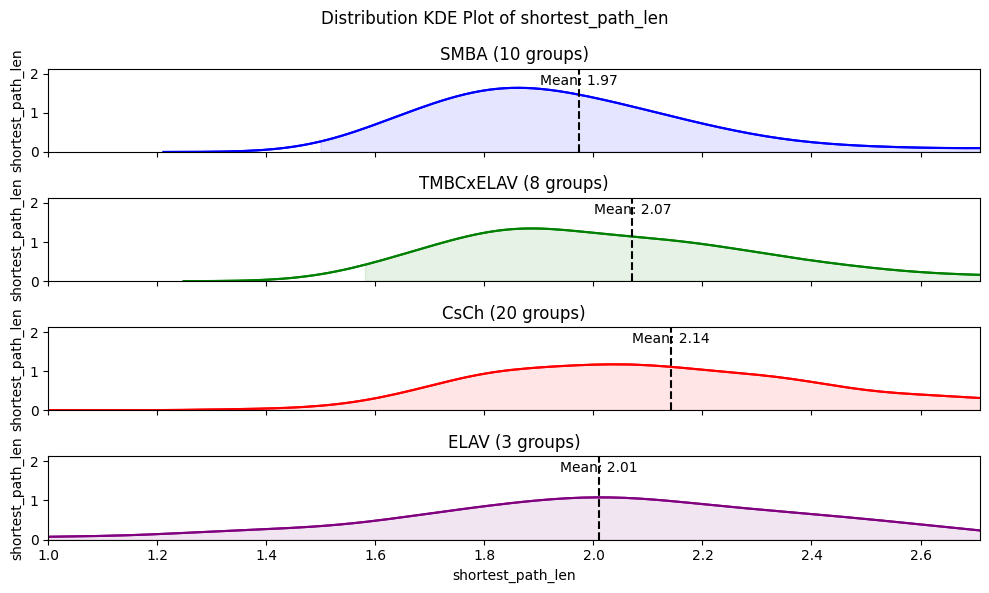

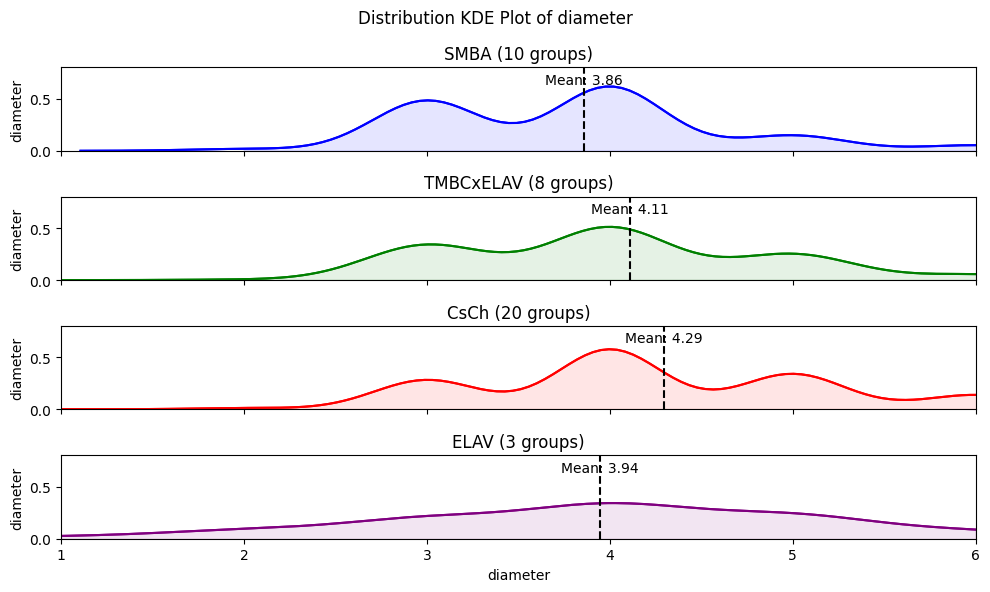

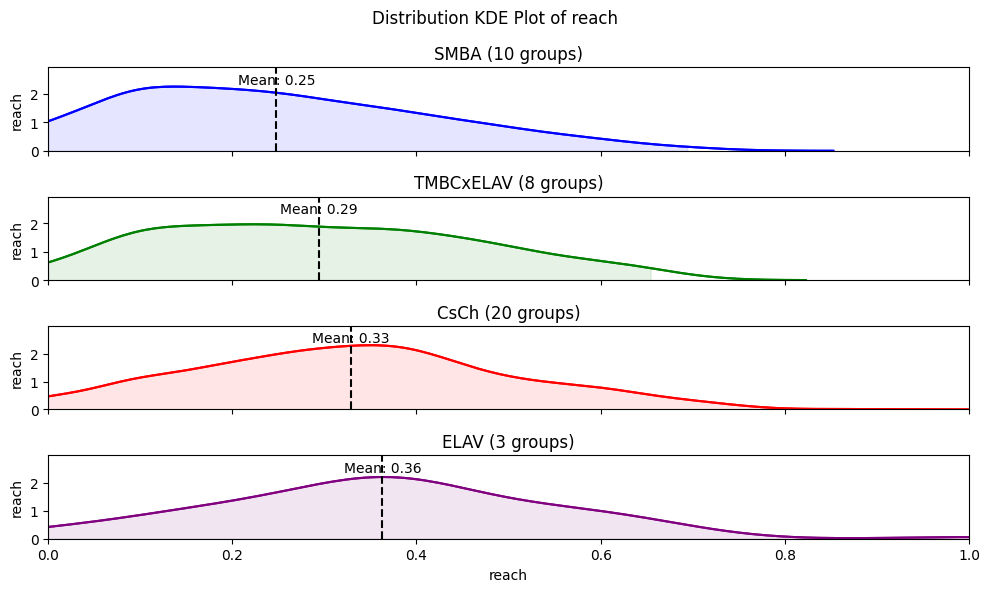

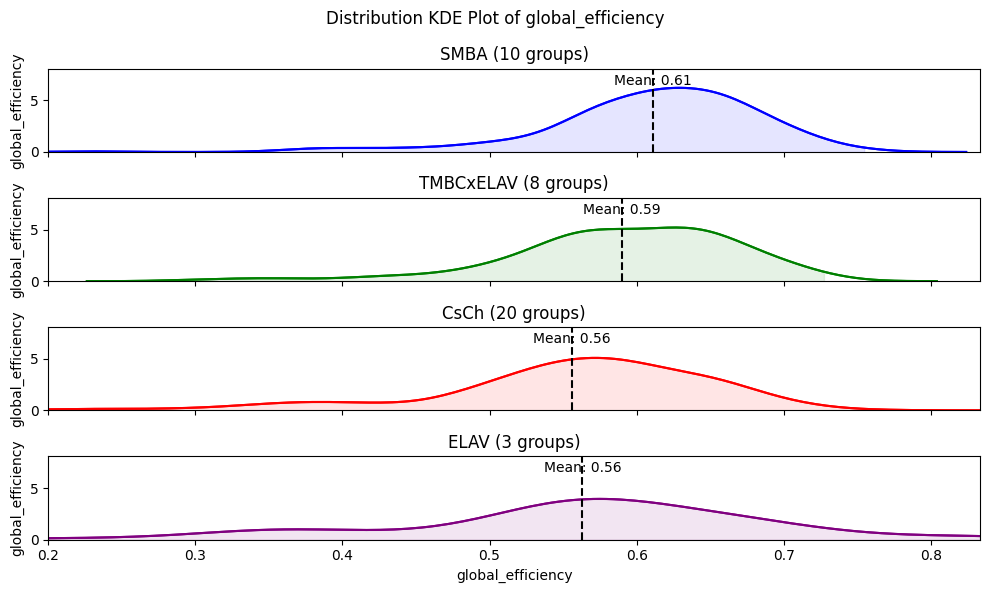

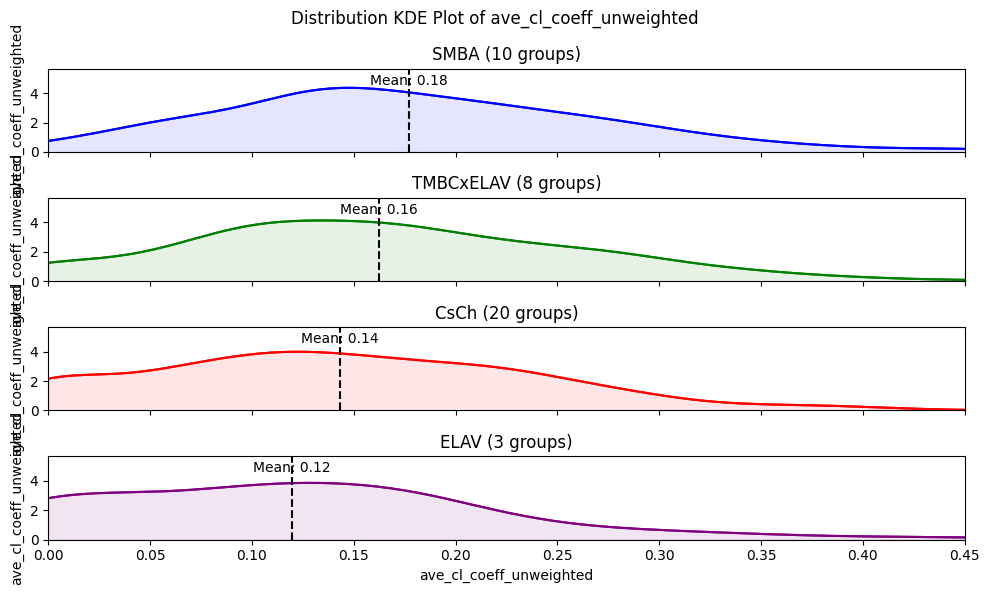

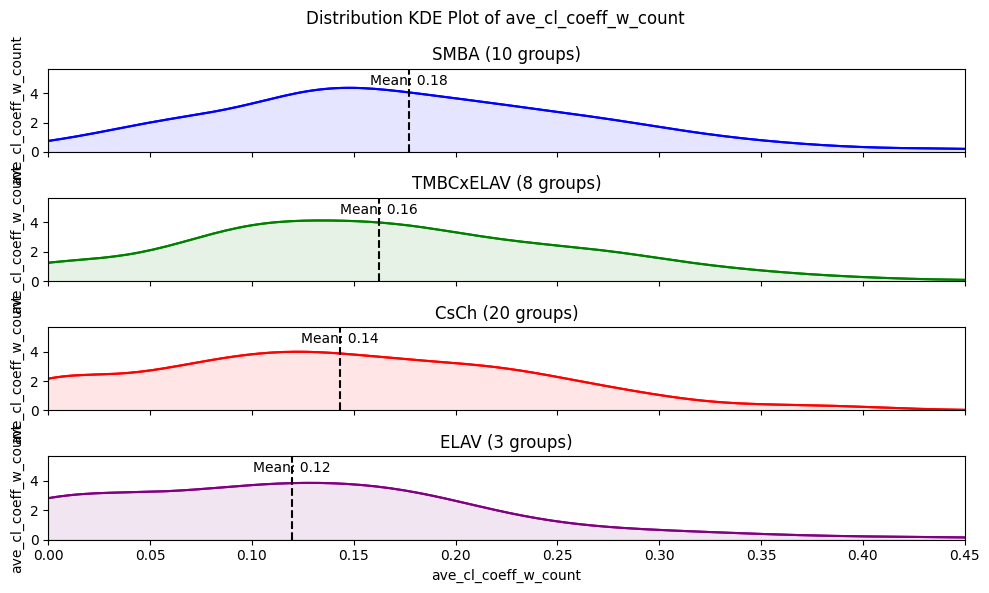

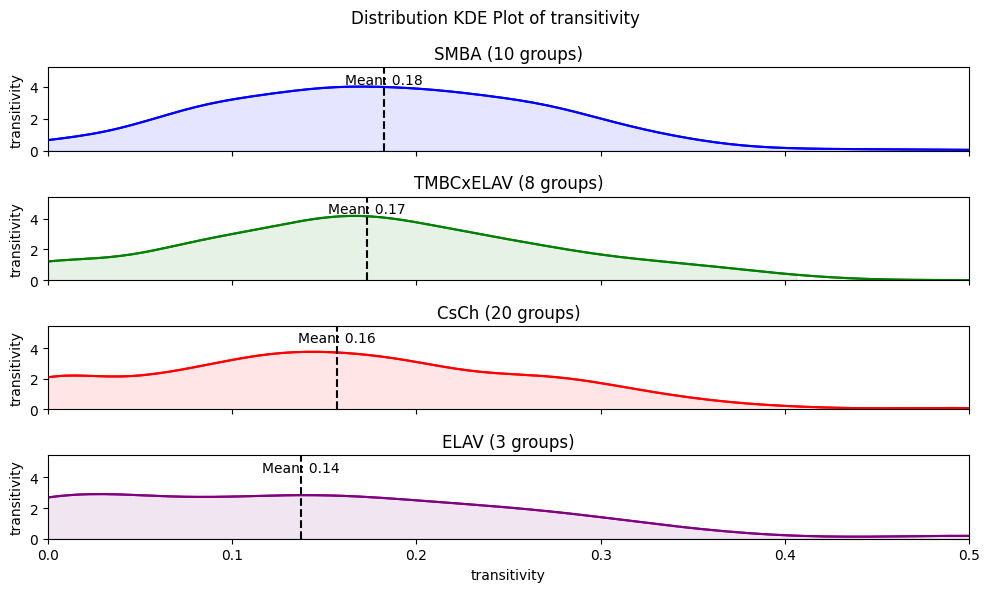

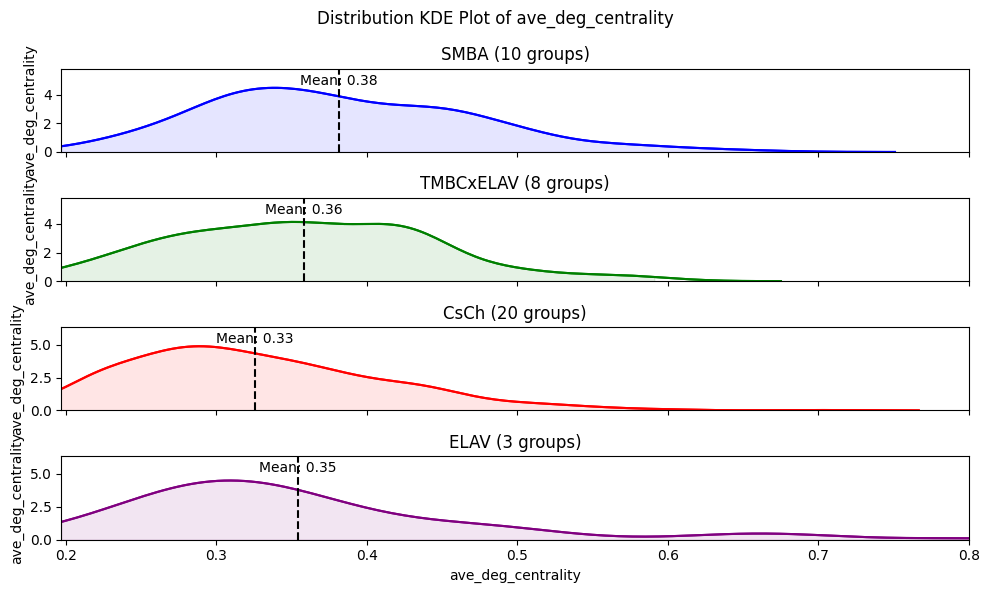

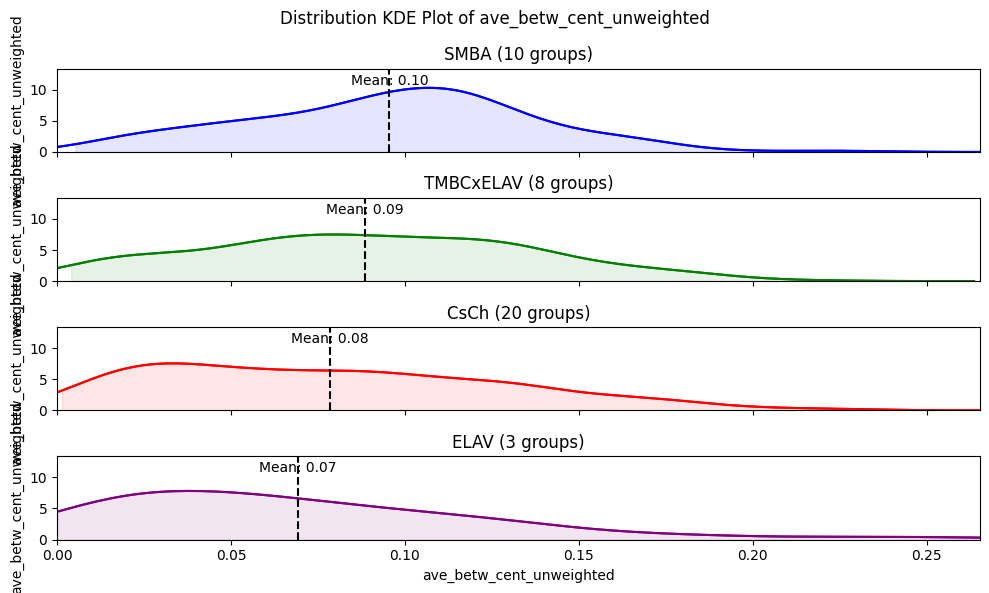

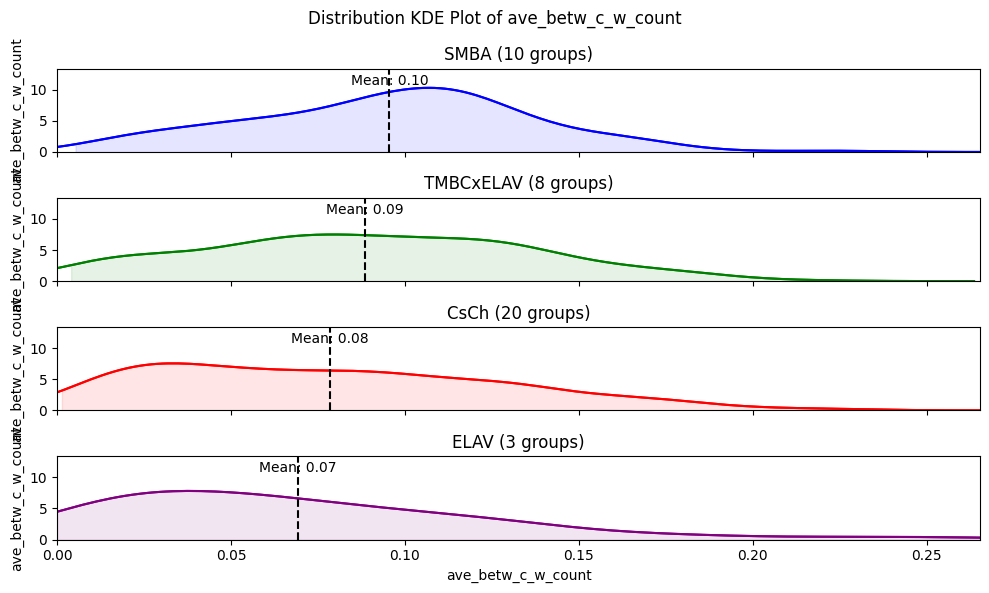

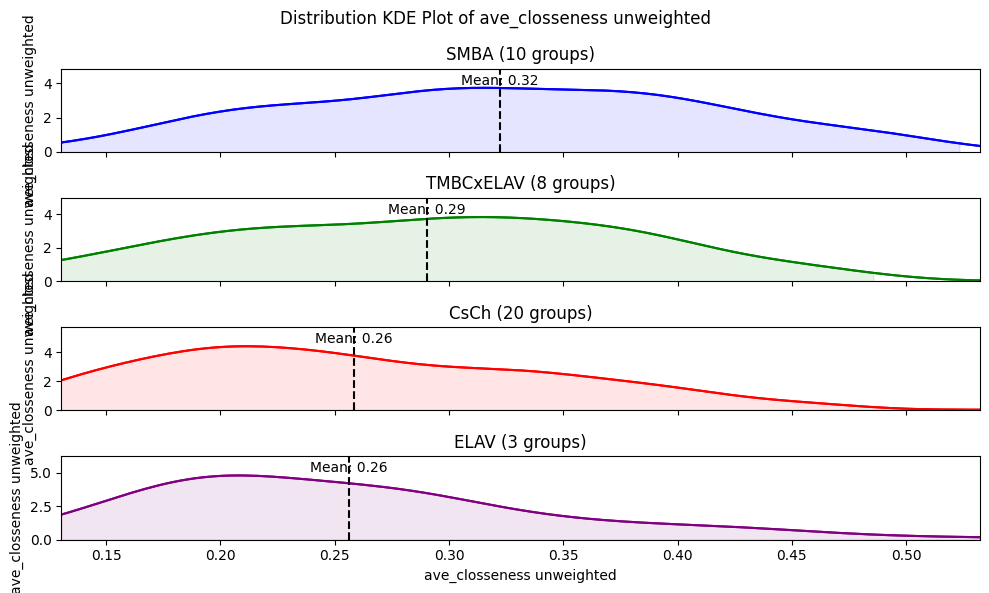

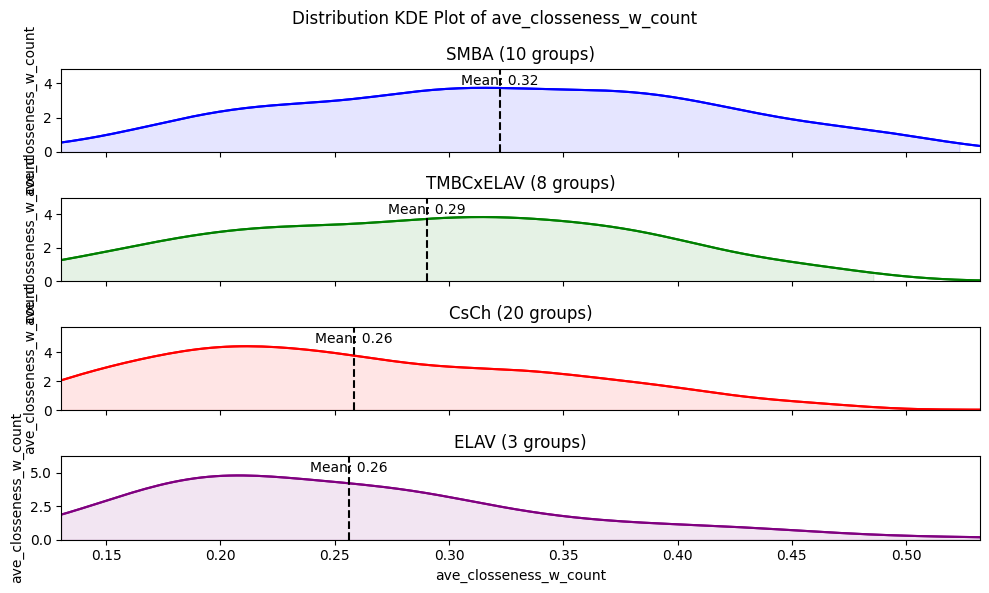

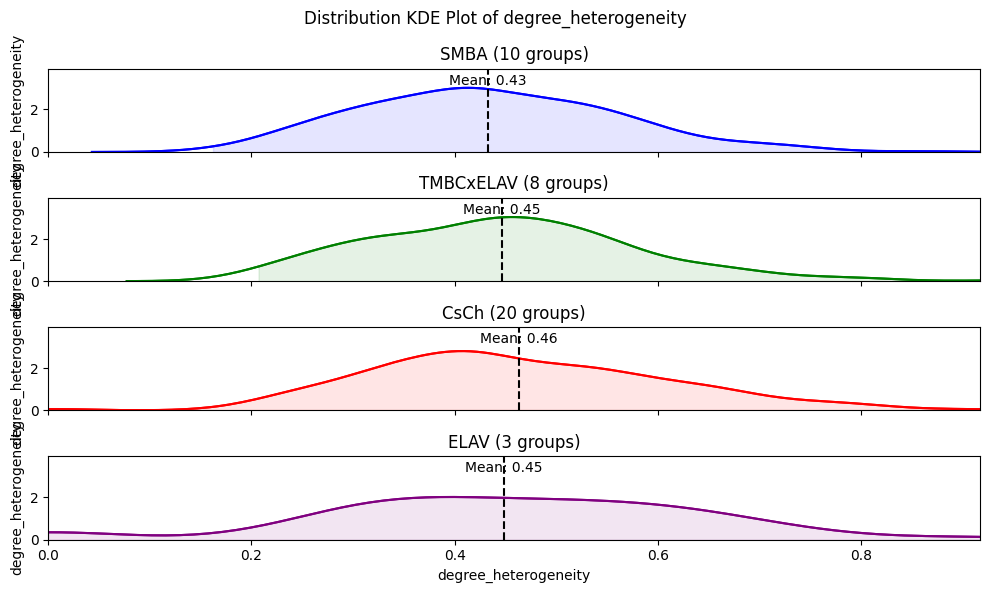

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


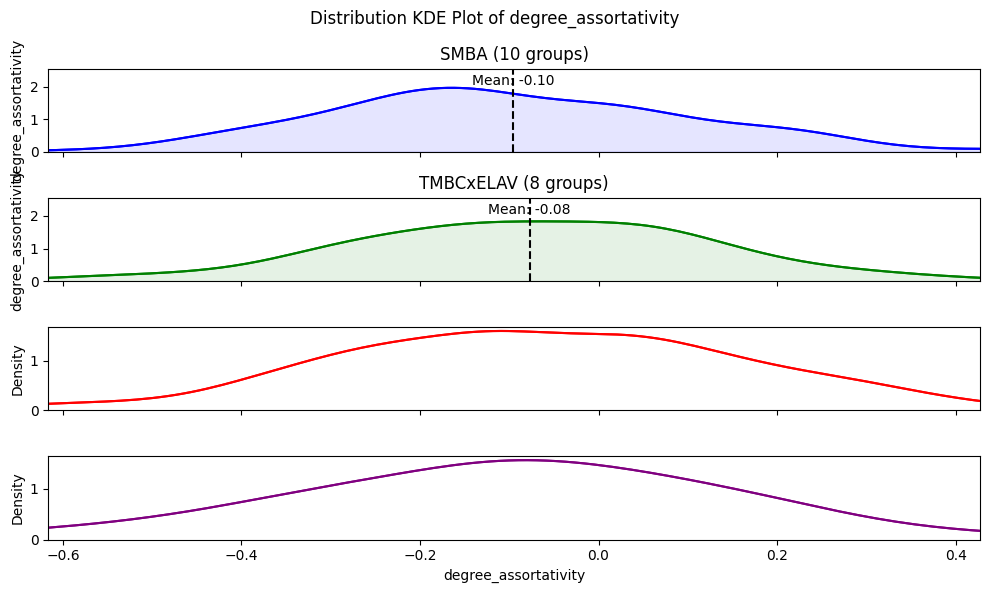

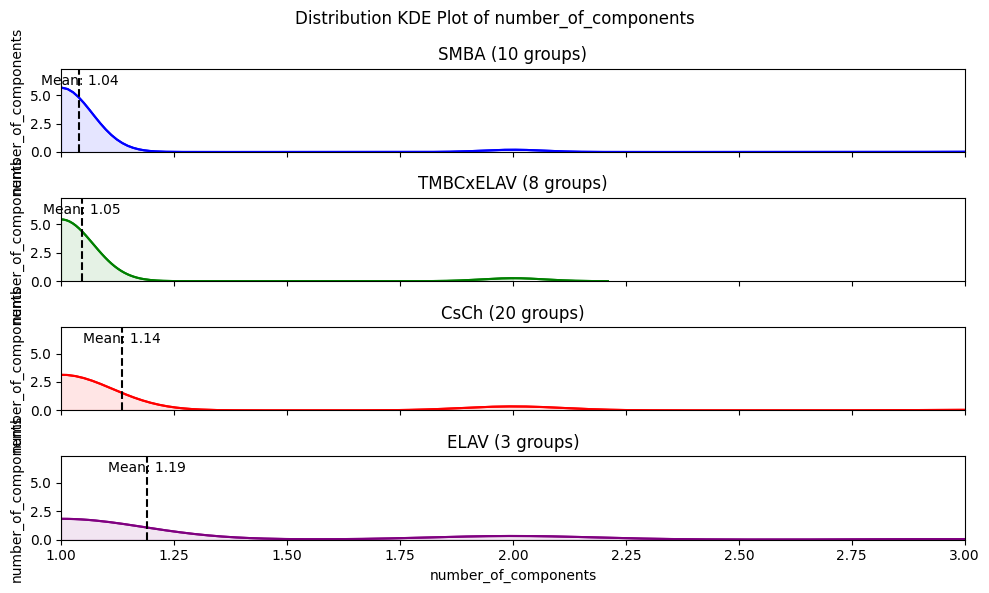

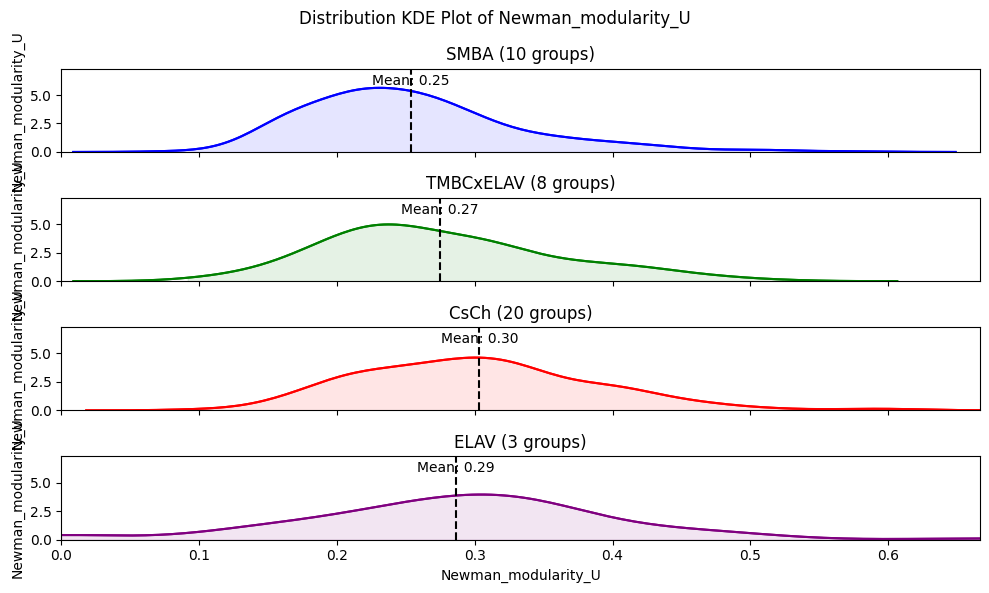

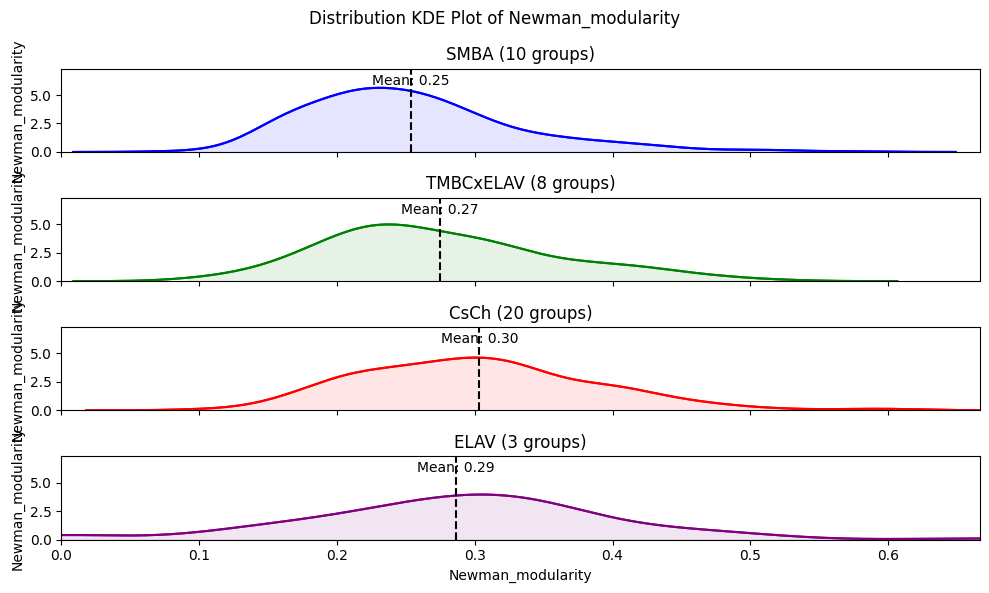

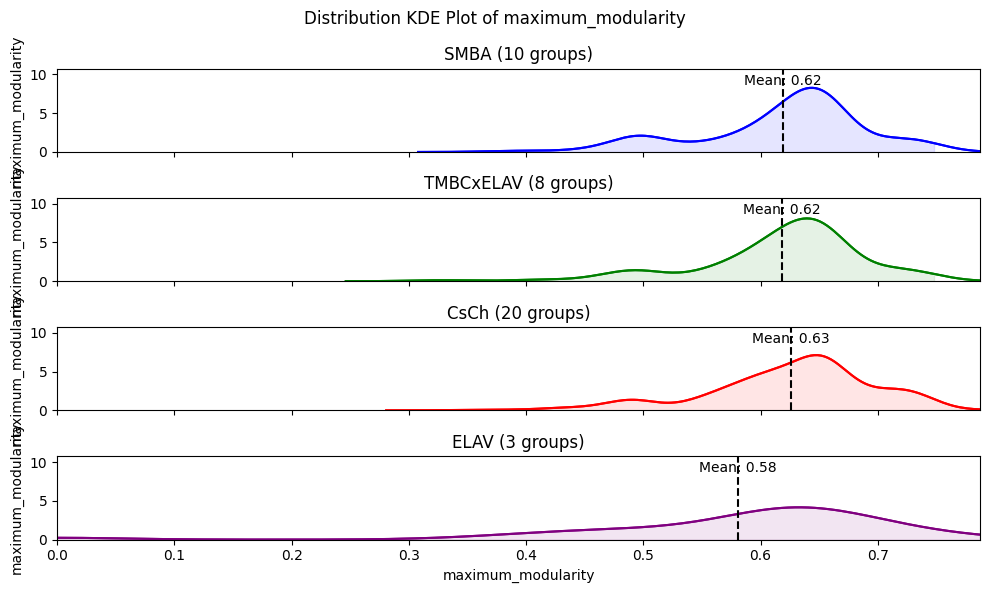

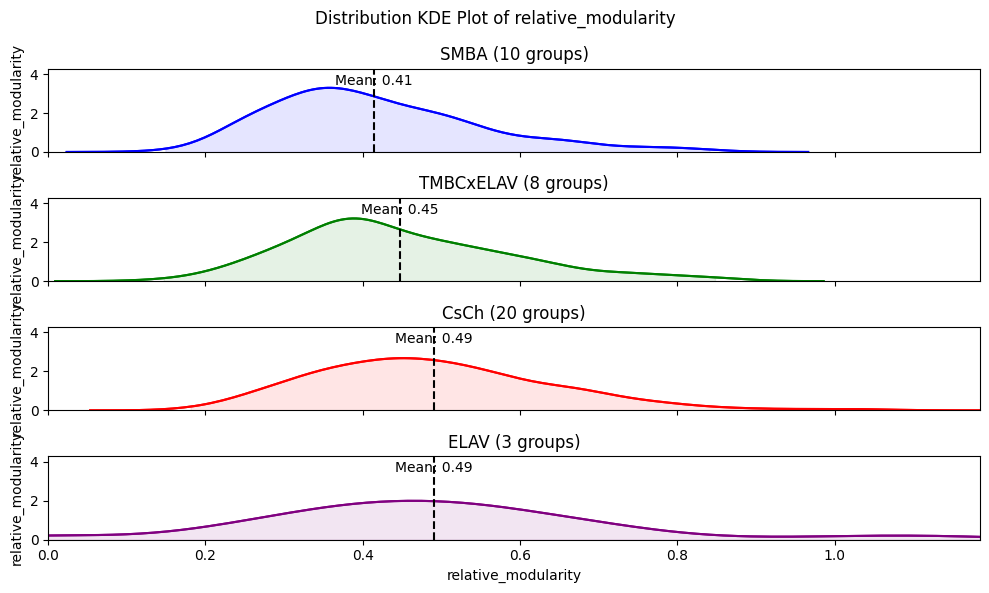

/tmp/ipykernel_1322994/4077959942.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=treatment_measure_values, ax=axs[i], color=colors[i])
/tmp/ipykernel_1322994/4077959942.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kde = sns.kdeplot(data=treatment_measure_values, ax=axs[i], color=colors[i])
/tmp/ipykernel_1322994/4077959942.py:35: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axs[i].set_xlim(np.min(treatment_measure_values), np.max(treatment_measure_values))
/tmp/ipykernel_1322994/4077959942.py:36: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs[i].set_ylim(0, max_density +  max_density * 0.3)  # Set y-axis limit dynamically
/tmp/ipykernel_1322994/4077959942.py:21: UserWa

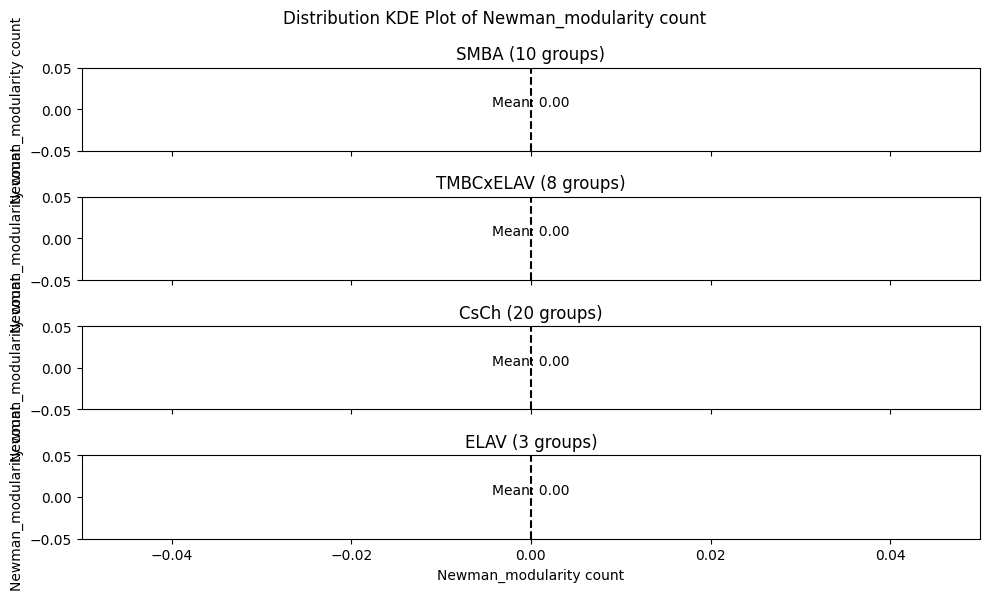

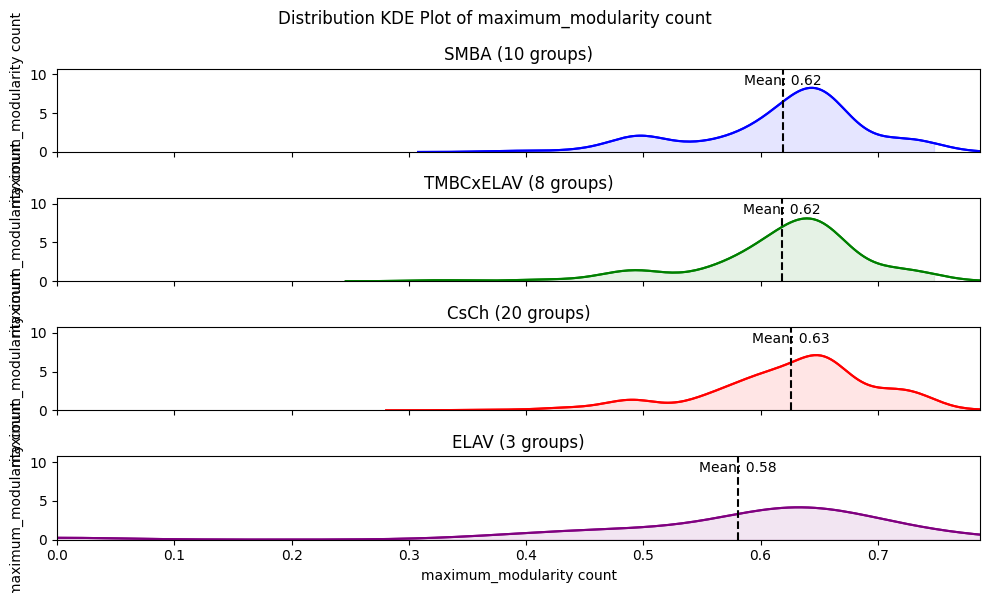

/tmp/ipykernel_1322994/4077959942.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=treatment_measure_values, ax=axs[i], color=colors[i])
/tmp/ipykernel_1322994/4077959942.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kde = sns.kdeplot(data=treatment_measure_values, ax=axs[i], color=colors[i])
/tmp/ipykernel_1322994/4077959942.py:35: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axs[i].set_xlim(np.min(treatment_measure_values), np.max(treatment_measure_values))
/tmp/ipykernel_1322994/4077959942.py:36: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs[i].set_ylim(0, max_density +  max_density * 0.3)  # Set y-axis limit dynamically
/tmp/ipykernel_1322994/4077959942.py:21: UserWa

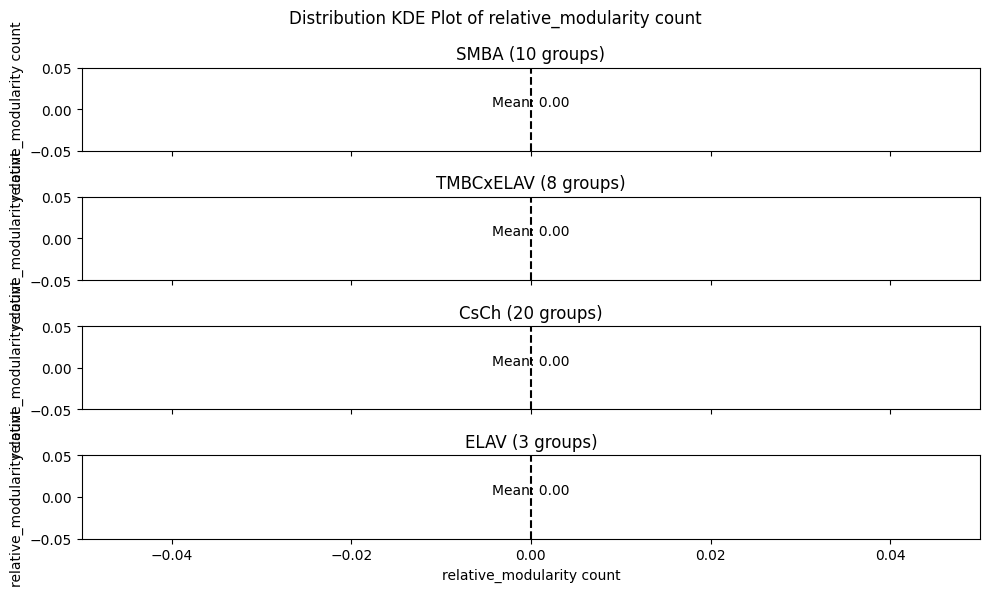

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

colors = ['blue', 'green', 'red', 'purple']

for measure_name in list(df.columns):
    fig, axs = plt.subplots(4, 1, figsize=(10, 6), sharex=True)
    max_density = 0 

    for i, (treatment_name, treatment_path) in enumerate(all_treatments.items()):
        all_groups = fileio.load_files_from_folder(treatment_path)
        treatment_measure_values = []
        num_groups = len(all_groups)
    
        for group_name, group_path in all_groups.items():
            df = pd.read_csv(group_path, index_col=0)
            measure_values = df[measure_name].values
            treatment_measure_values.extend(measure_values)
        
        sns.kdeplot(data=treatment_measure_values, ax=axs[i], color=colors[i])
        kde = sns.kdeplot(data=treatment_measure_values, ax=axs[i], color=colors[i])
        
        if kde.get_lines():
            x = np.linspace(np.min(treatment_measure_values), np.max(treatment_measure_values), 300)
            y = np.interp(x, kde.get_lines()[0].get_data()[0], kde.get_lines()[0].get_data()[1])
            axs[i].fill_between(x, 0, y, alpha=0.1, color=colors[i])
            max_density = max(max_density, np.max(y))
        
        try:
            mean_value = np.mean(treatment_measure_values)
            axs[i].axvline(x=mean_value, color='black', linestyle='--', label='Mean')
            axs[i].text(mean_value, max_density, f"Mean: {mean_value:.2f}", color='black', ha='center', va='bottom')
            
            axs[i].set_xlim(np.min(treatment_measure_values), np.max(treatment_measure_values))
            axs[i].set_ylim(0, max_density +  max_density * 0.3)  # Set y-axis limit dynamically
            axs[i].set_ylabel(measure_name)
            axs[i].set_title('{} ({} groups)'.format(treatment_name, num_groups))
        
        except:
            continue

    axs[-1].set_xlabel(measure_name)
    fig.suptitle('Distribution KDE Plot of {}'.format(measure_name))
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_1317854/16136389.py:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=treatment_measure_values, ax=axs[i], color=colors[i])
/tmp/ipykernel_1317854/16136389.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kde = sns.kdeplot(data=treatment_measure_values, ax=axs[i], color=colors[i])
/tmp/ipykernel_1317854/16136389.py:44: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axs[i].set_xlim(np.min(treatment_measure_values), np.max(treatment_measure_values))
/tmp/ipykernel_1317854/16136389.py:45: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs[i].set_ylim(0, max_density +  max_density * 0.3)  # Set y-axis limit dynamically


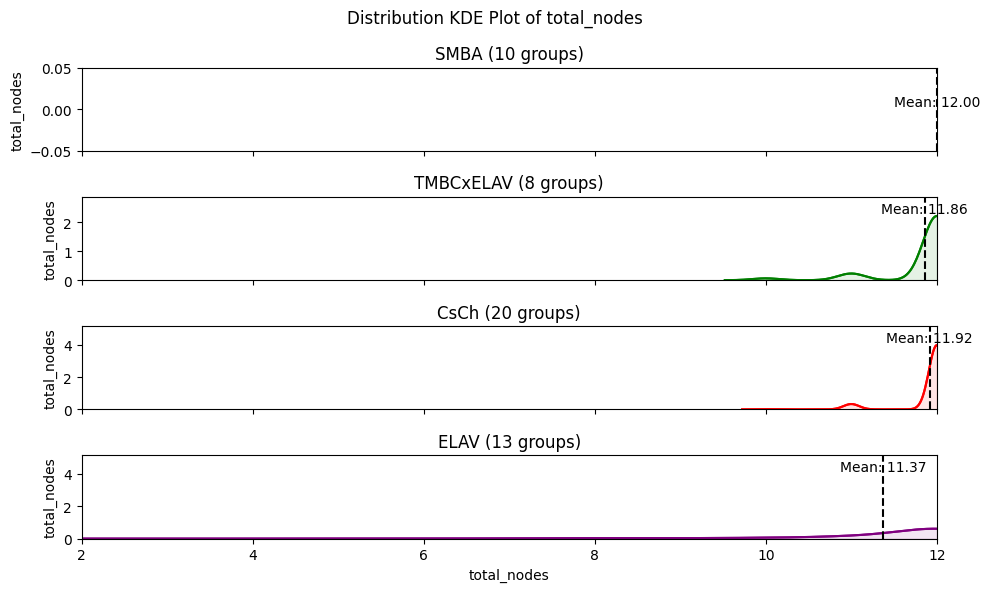

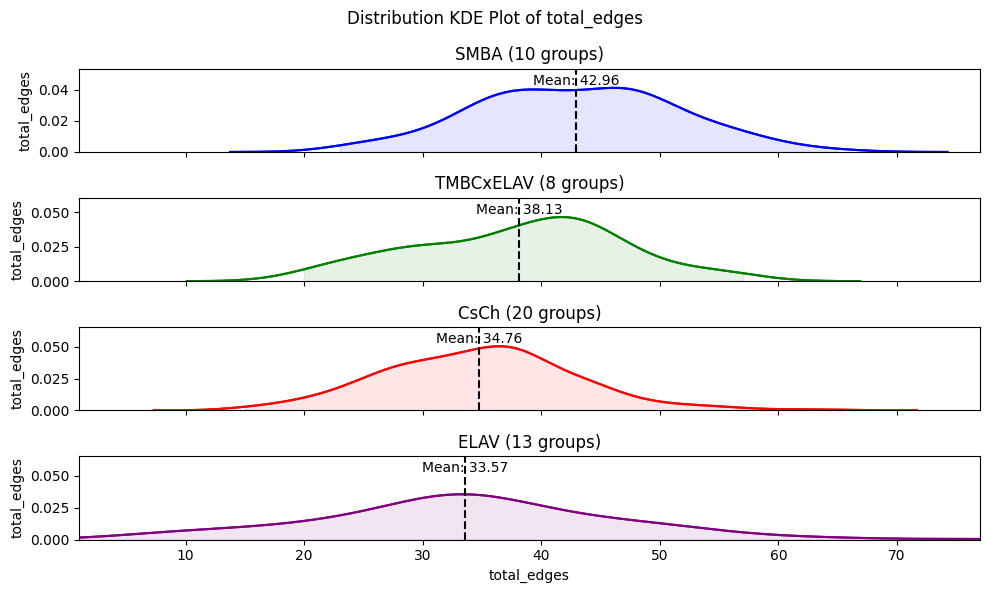

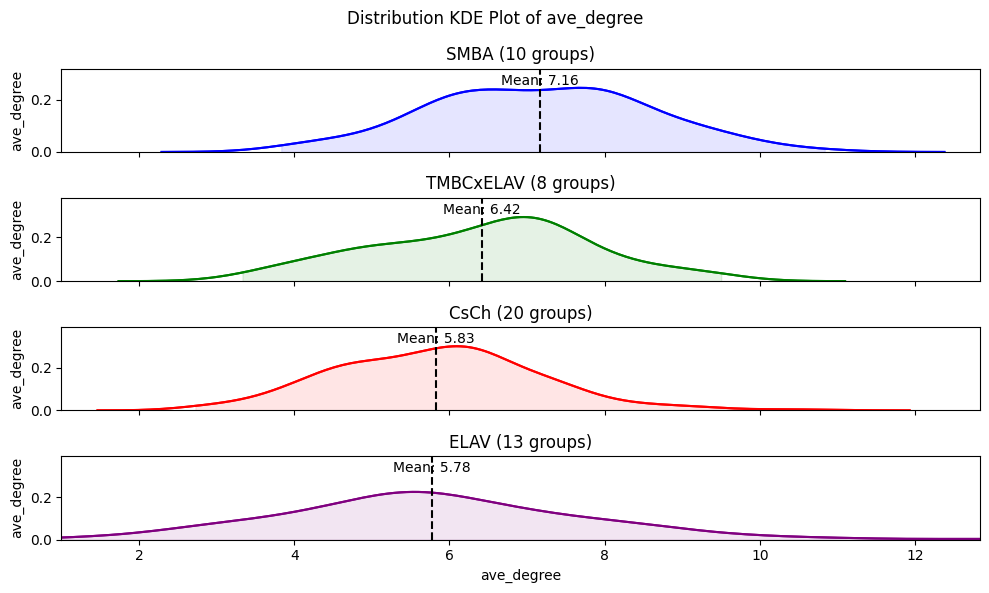

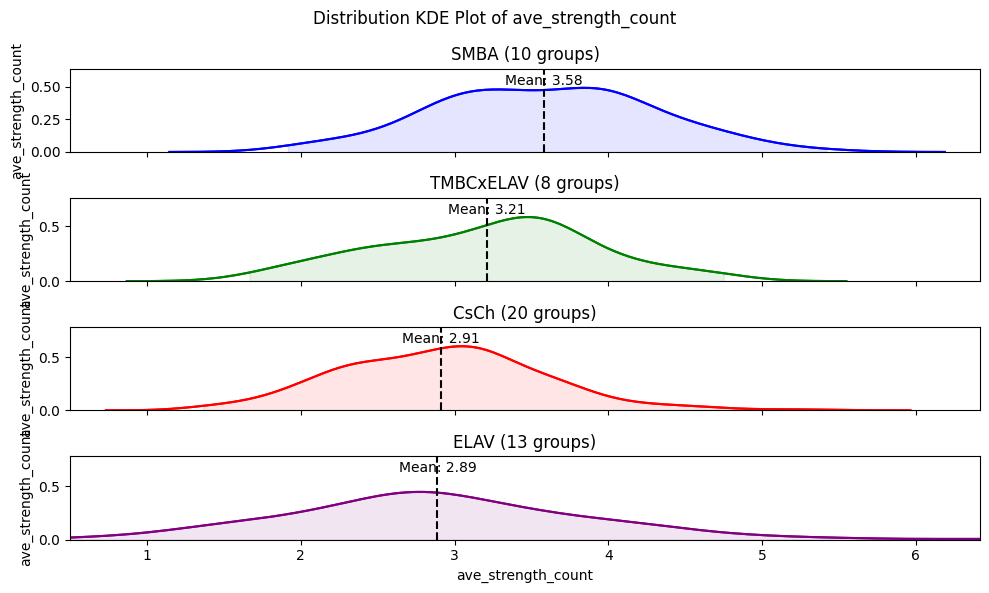

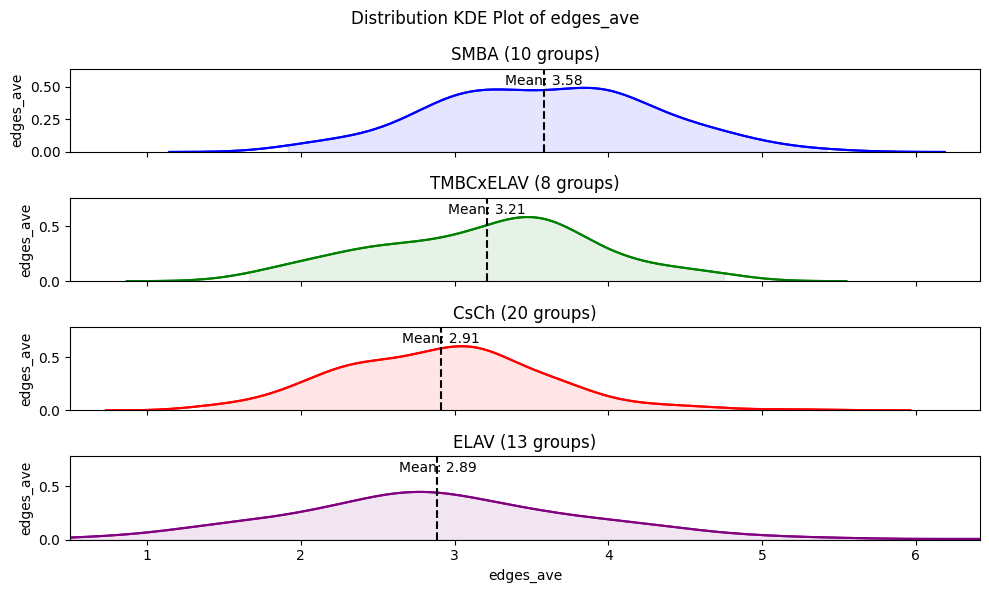

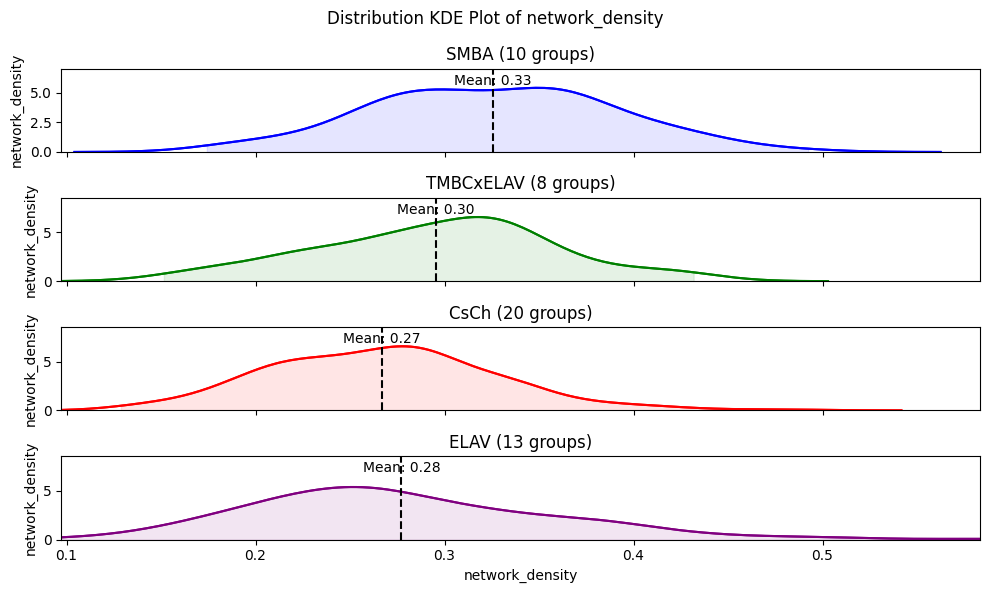

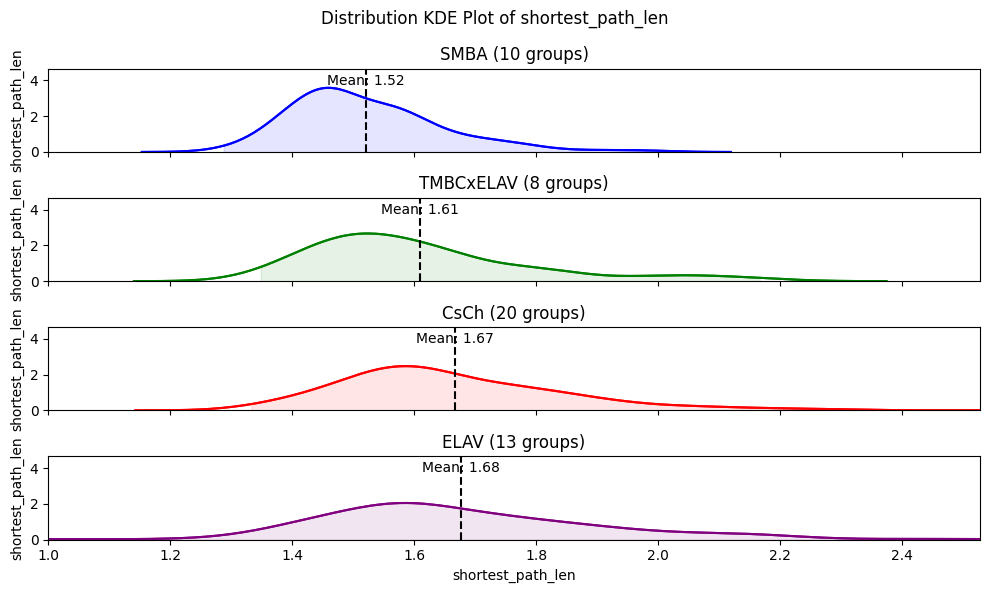

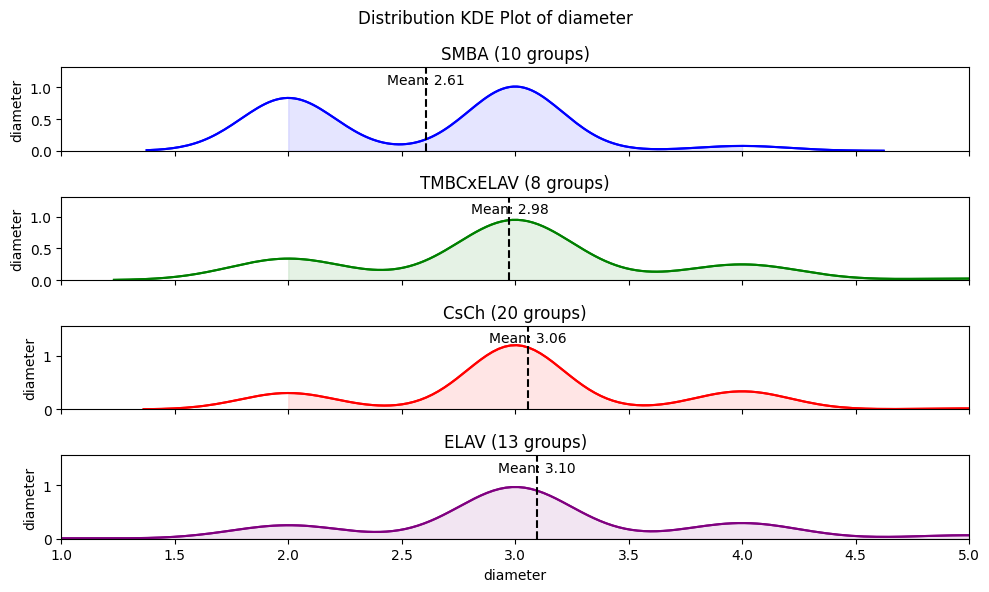

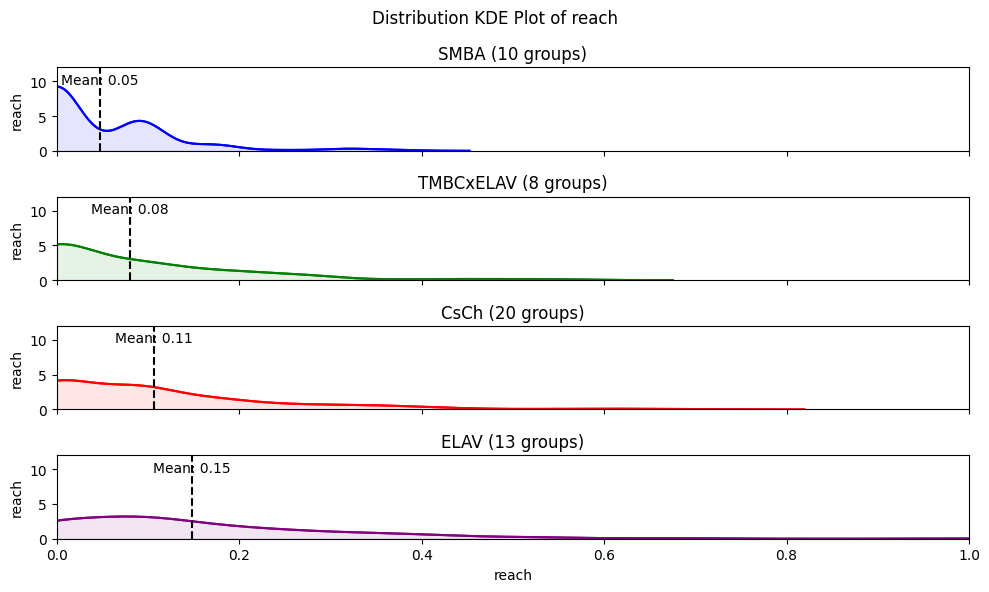

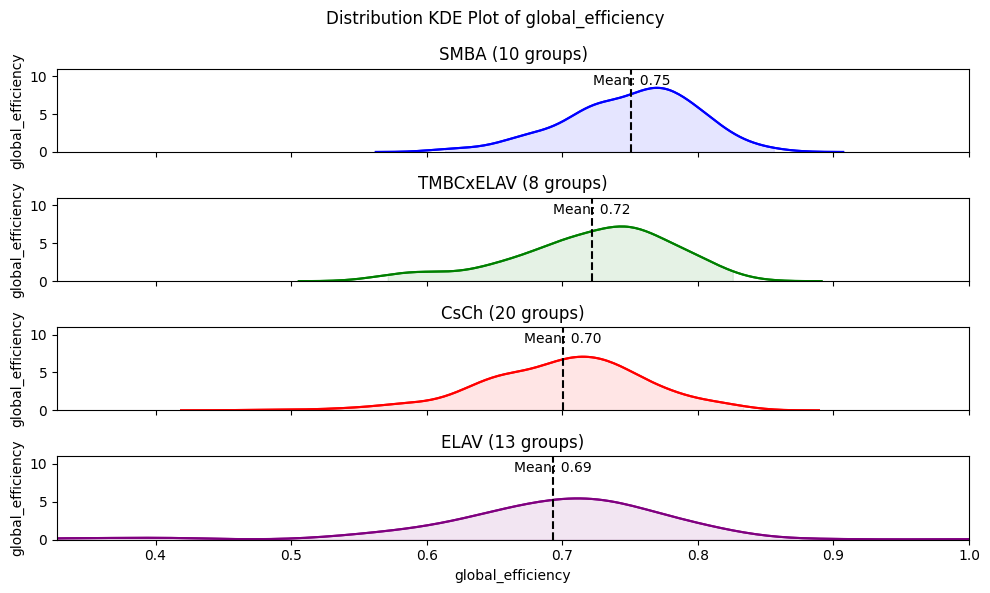

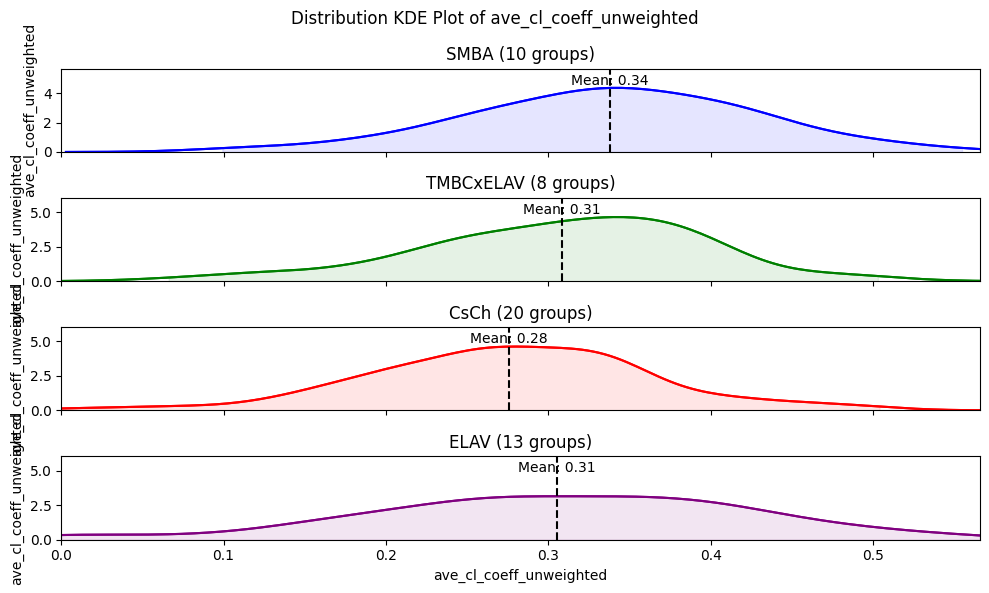

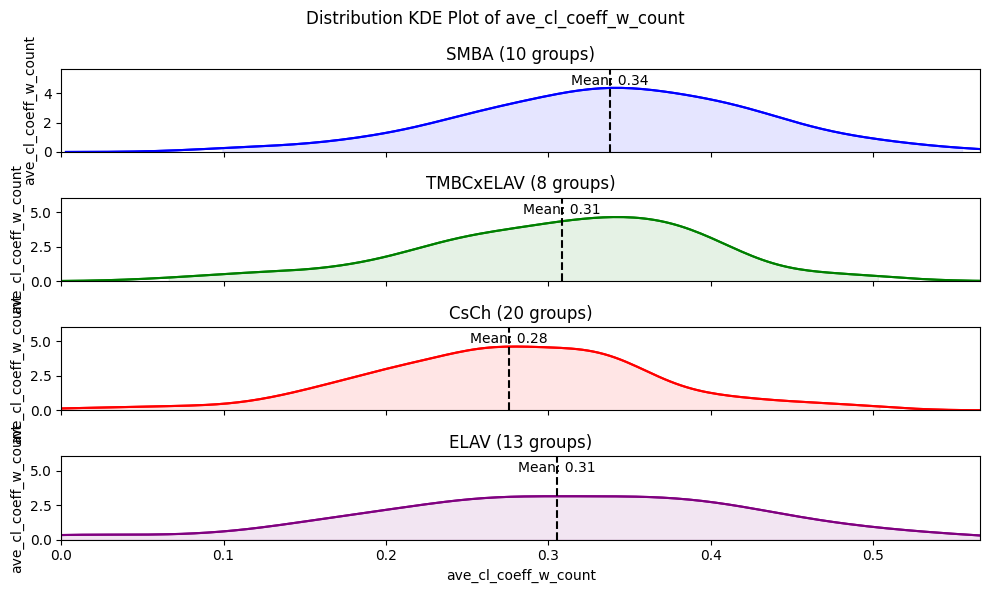

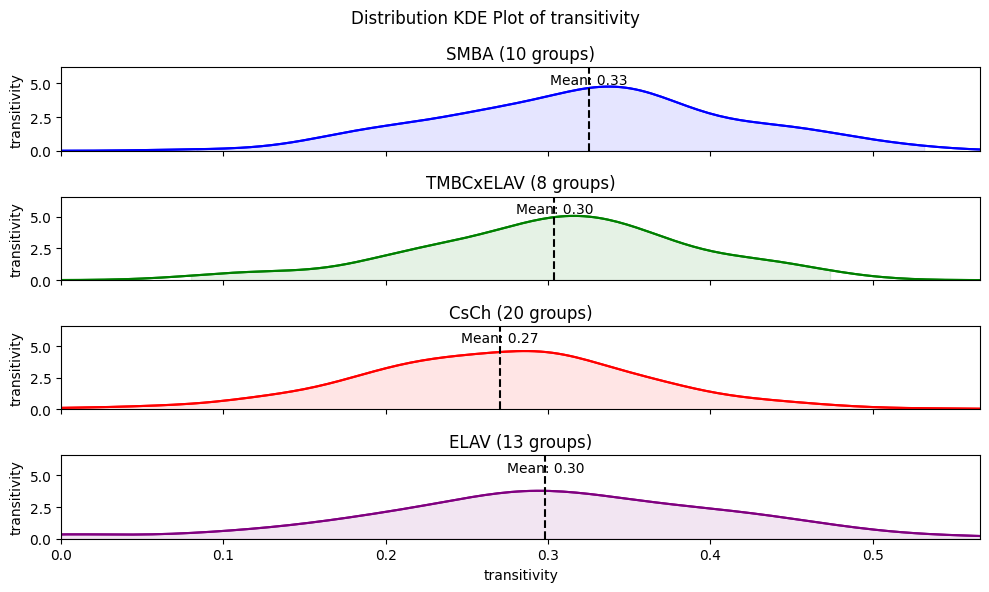

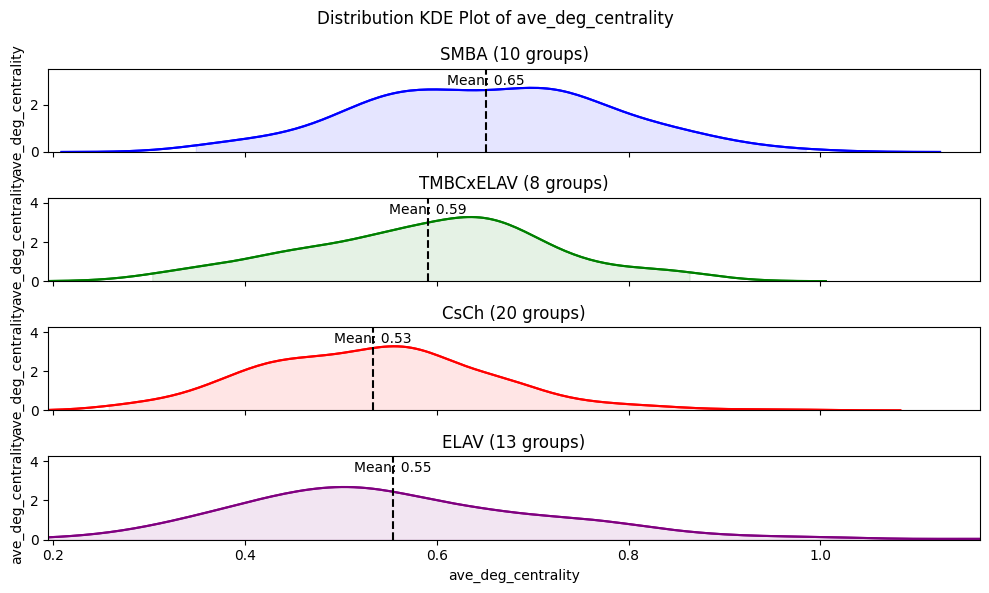

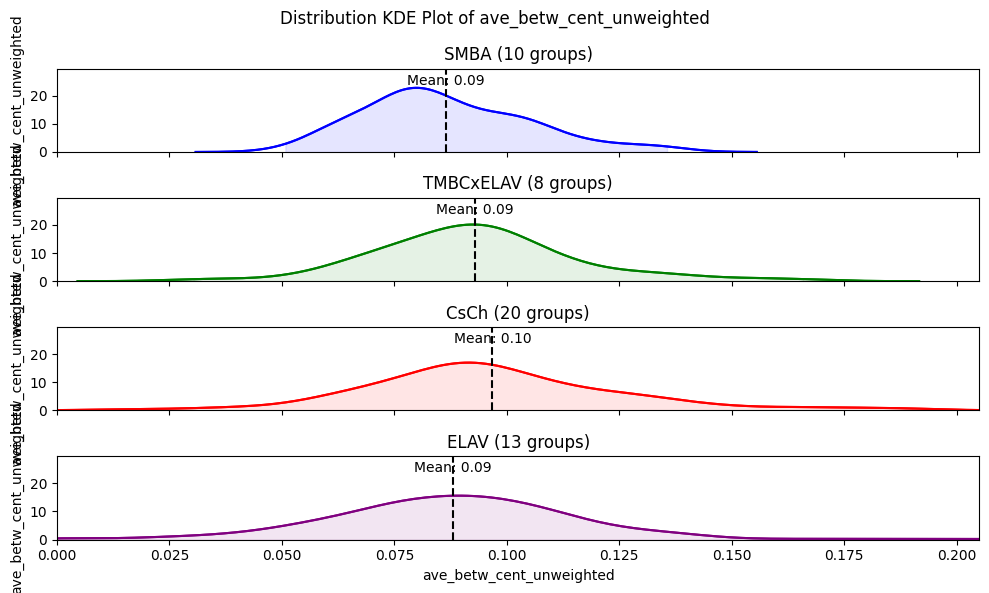

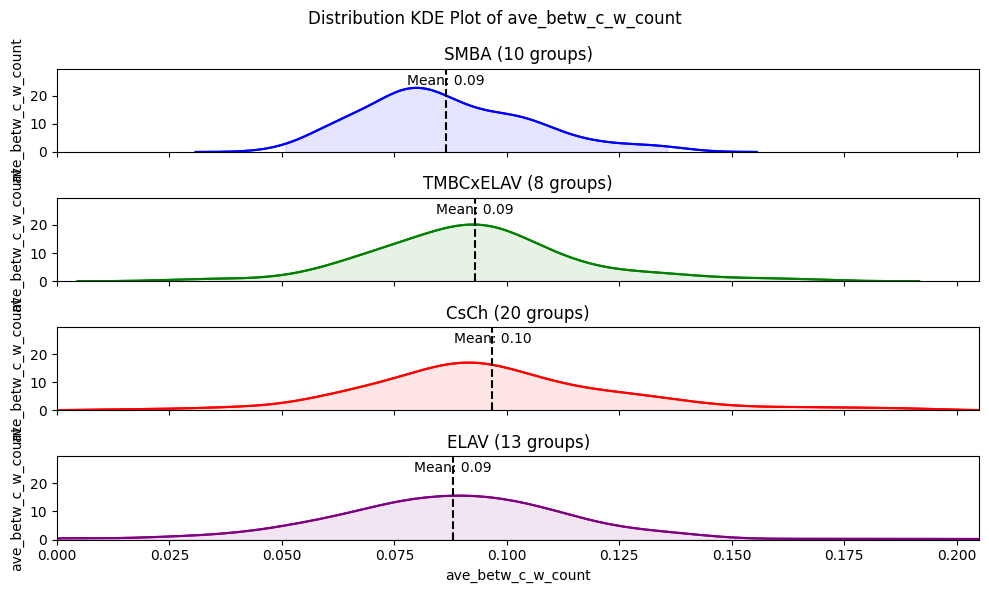

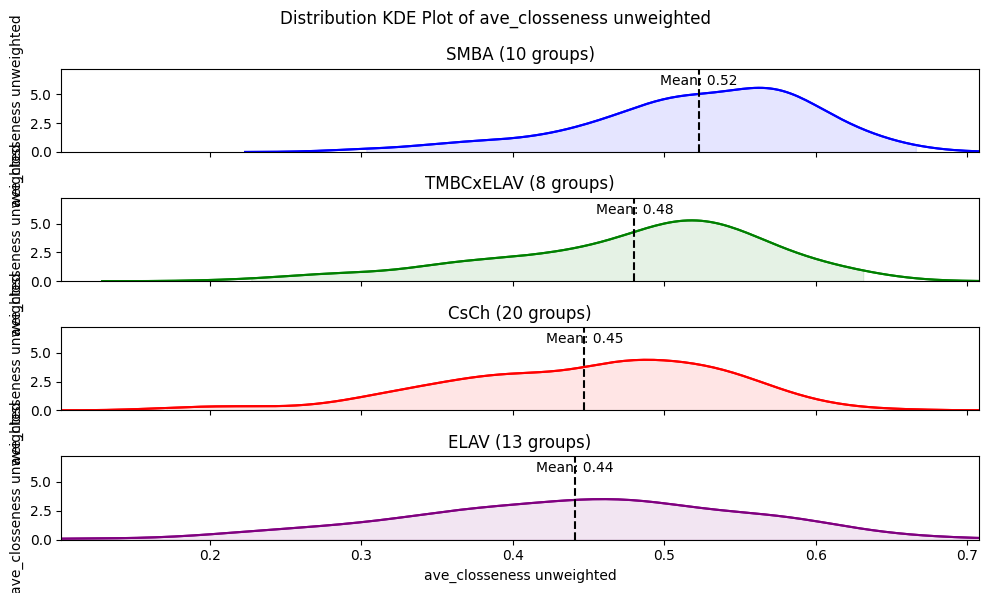

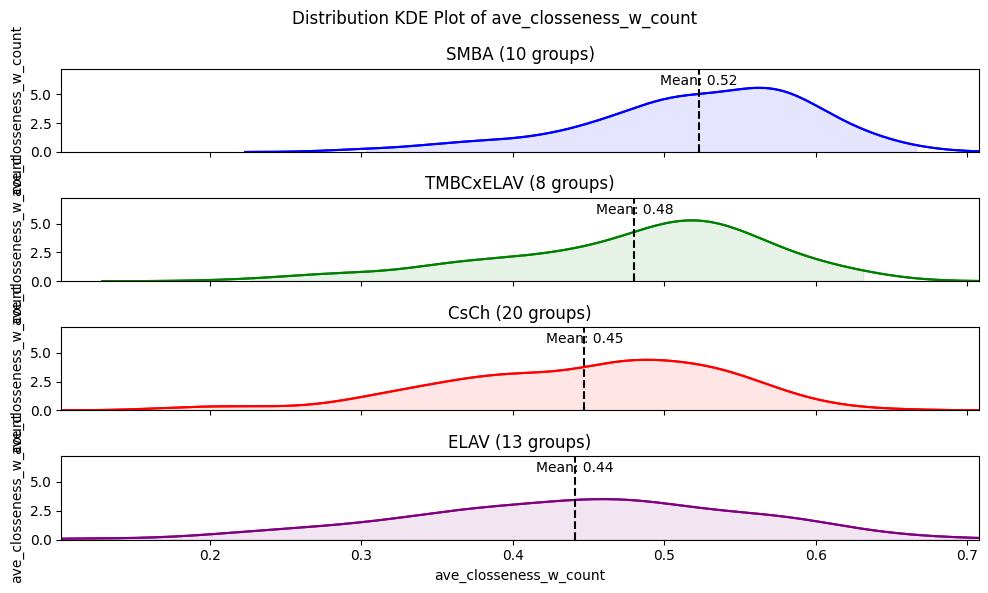

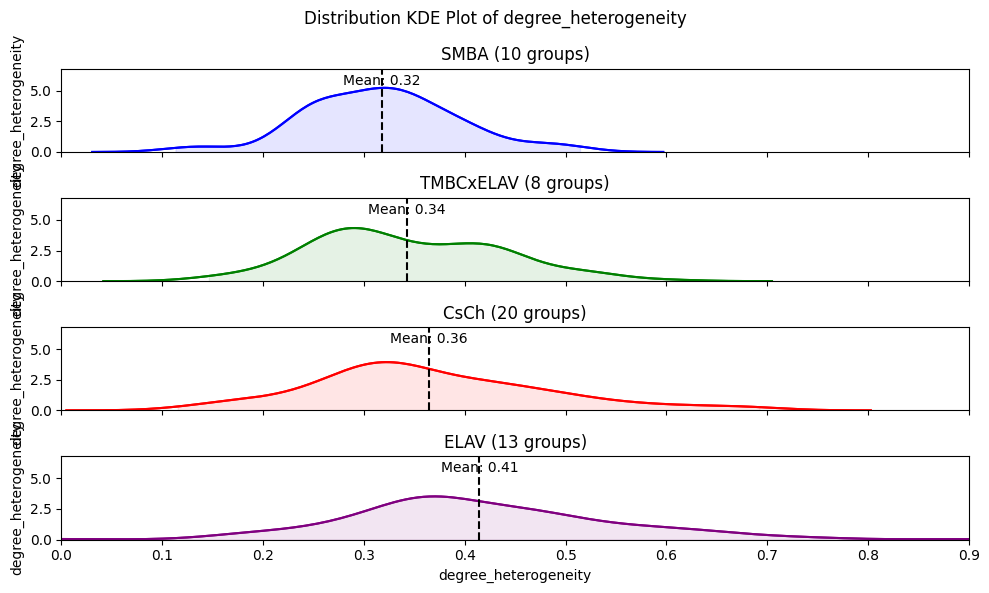

posx and posy should be finite values
posx and posy should be finite values


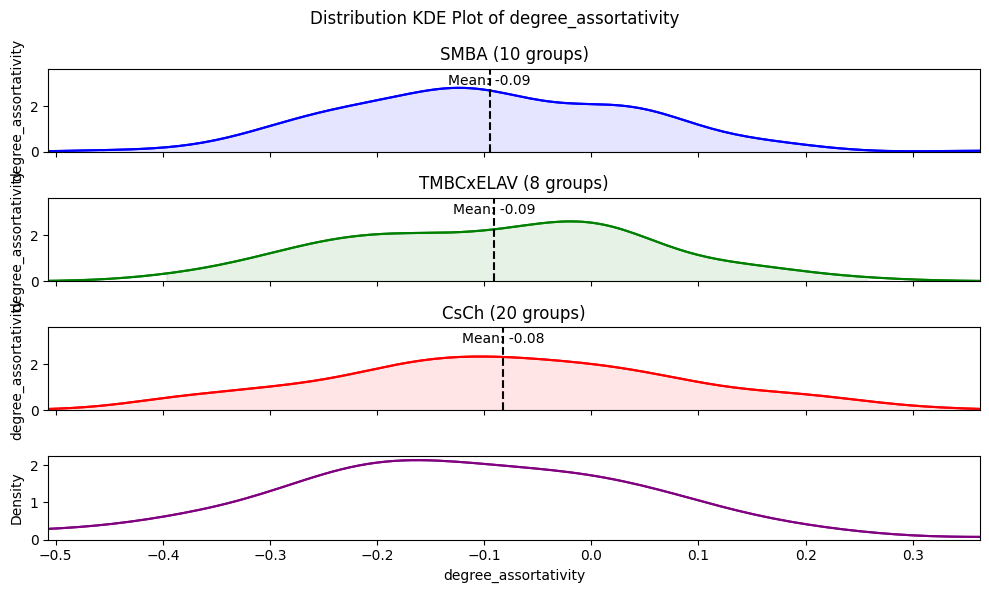

/tmp/ipykernel_1317854/16136389.py:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=treatment_measure_values, ax=axs[i], color=colors[i])
/tmp/ipykernel_1317854/16136389.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kde = sns.kdeplot(data=treatment_measure_values, ax=axs[i], color=colors[i])
/tmp/ipykernel_1317854/16136389.py:44: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axs[i].set_xlim(np.min(treatment_measure_values), np.max(treatment_measure_values))
/tmp/ipykernel_1317854/16136389.py:45: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs[i].set_ylim(0, max_density +  max_density * 0.3)  # Set y-axis limit dynamically
/tmp/ipykernel_1317854/16136389.py:26: UserWarning: Dat

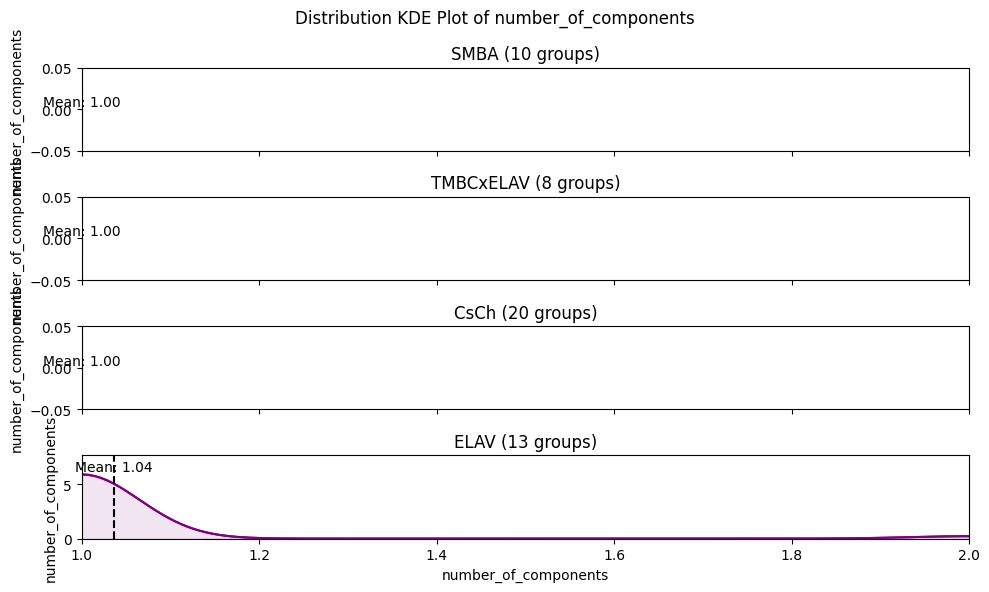

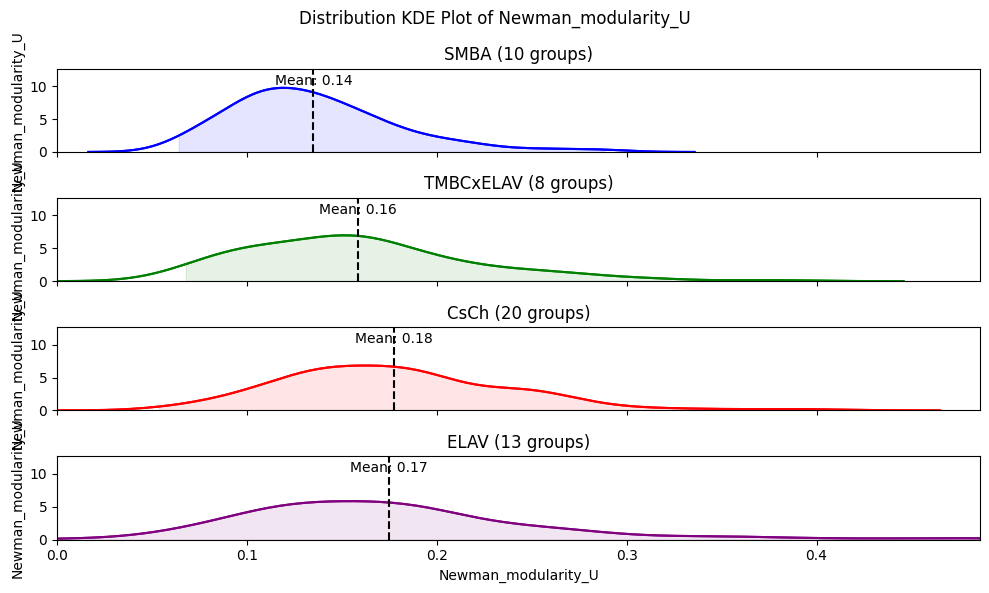

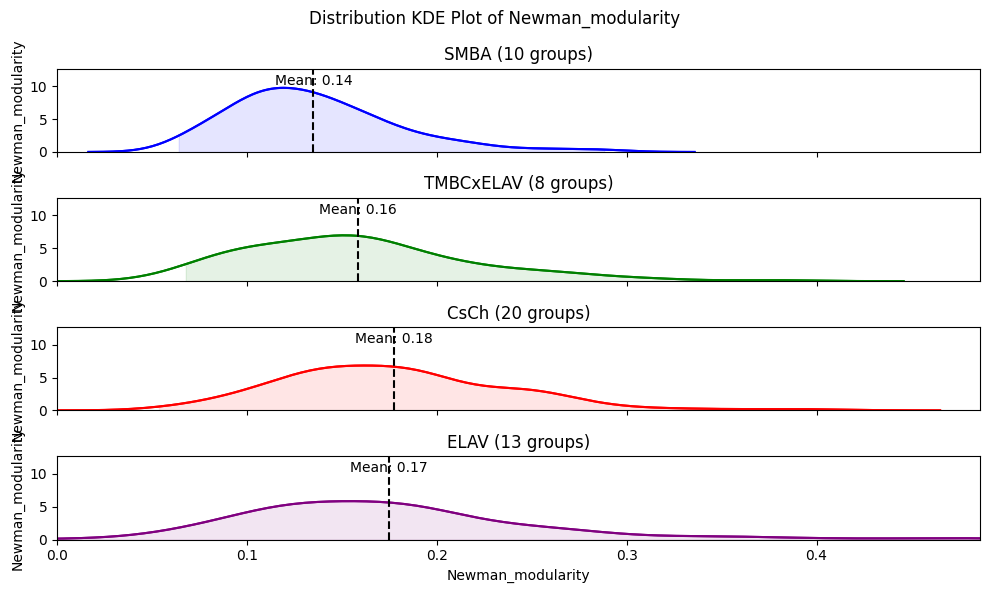

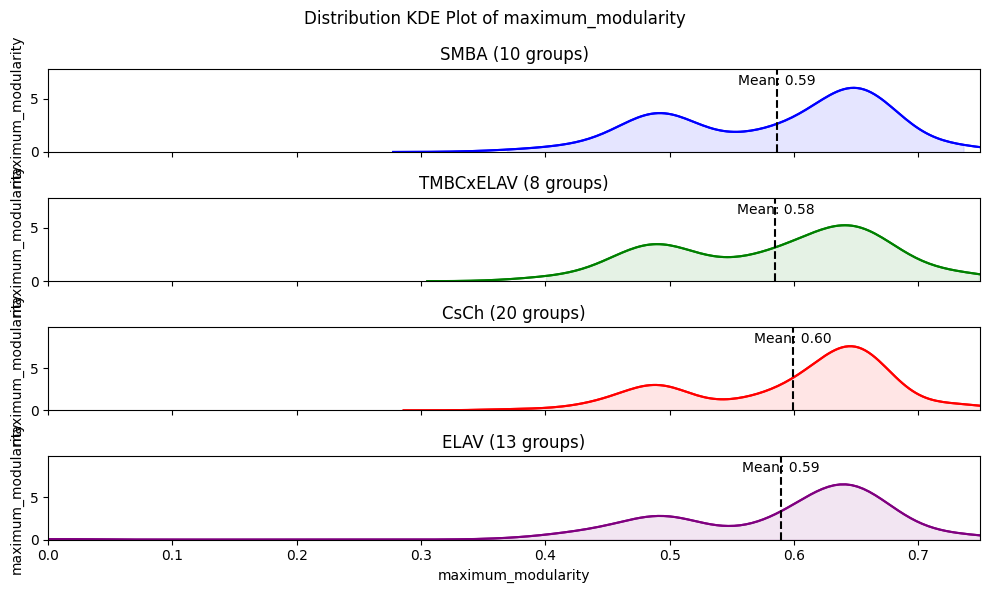

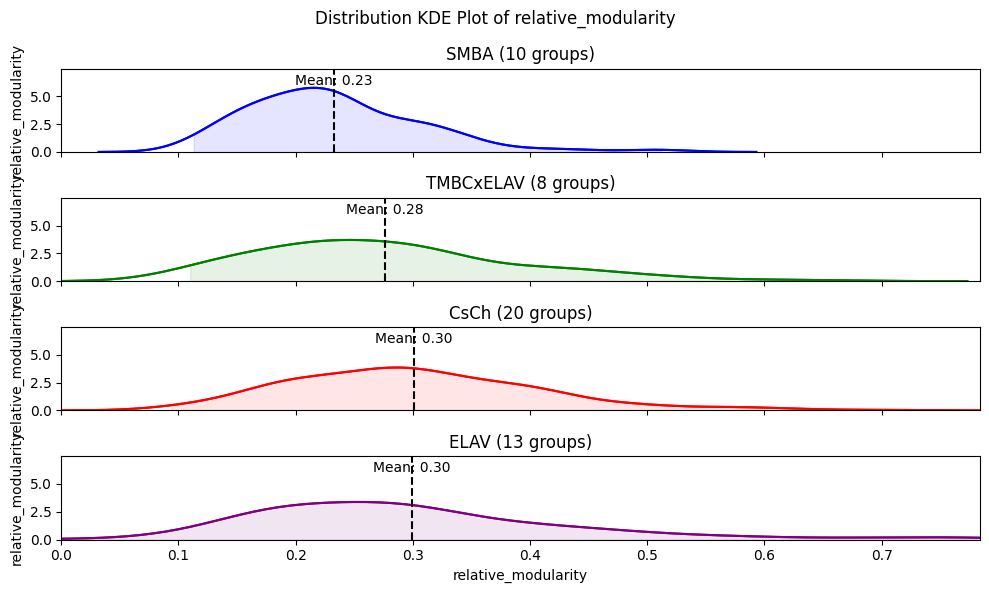

/tmp/ipykernel_1317854/16136389.py:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=treatment_measure_values, ax=axs[i], color=colors[i])
/tmp/ipykernel_1317854/16136389.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kde = sns.kdeplot(data=treatment_measure_values, ax=axs[i], color=colors[i])
/tmp/ipykernel_1317854/16136389.py:44: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axs[i].set_xlim(np.min(treatment_measure_values), np.max(treatment_measure_values))
/tmp/ipykernel_1317854/16136389.py:45: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs[i].set_ylim(0, max_density +  max_density * 0.3)  # Set y-axis limit dynamically
/tmp/ipykernel_1317854/16136389.py:26: UserWarning: Dat

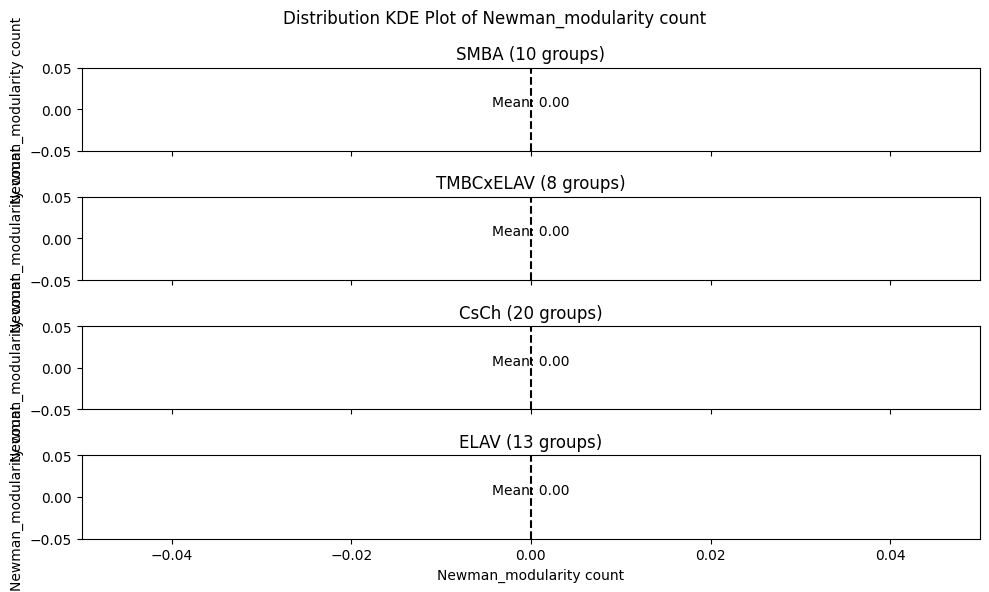

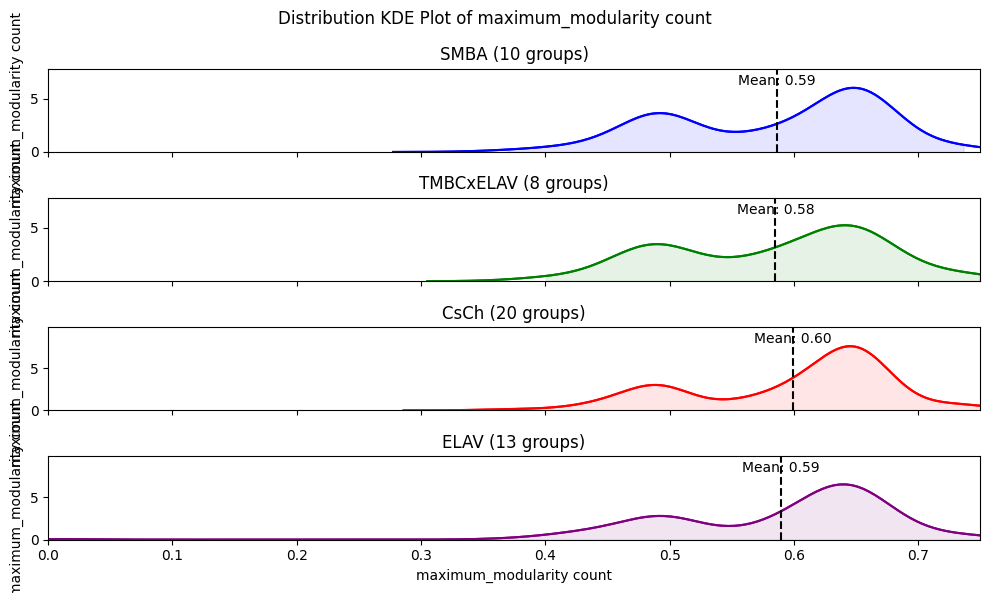

/tmp/ipykernel_1317854/16136389.py:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=treatment_measure_values, ax=axs[i], color=colors[i])
/tmp/ipykernel_1317854/16136389.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kde = sns.kdeplot(data=treatment_measure_values, ax=axs[i], color=colors[i])
/tmp/ipykernel_1317854/16136389.py:44: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axs[i].set_xlim(np.min(treatment_measure_values), np.max(treatment_measure_values))
/tmp/ipykernel_1317854/16136389.py:45: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs[i].set_ylim(0, max_density +  max_density * 0.3)  # Set y-axis limit dynamically
/tmp/ipykernel_1317854/16136389.py:26: UserWarning: Dat

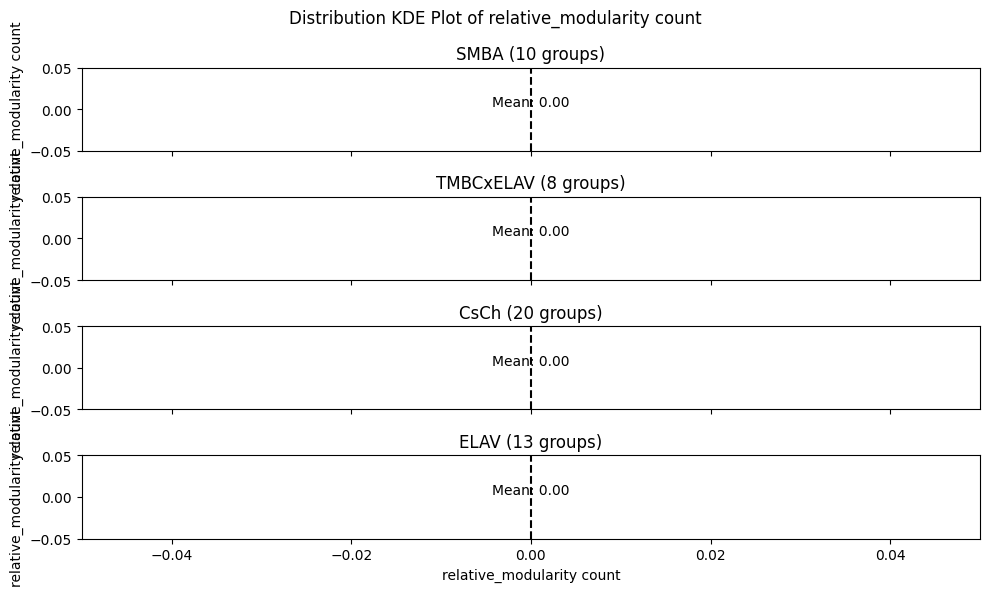